# Assignment 4

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTIONS 1 : Preps

### Flat Image : reference as "flat"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

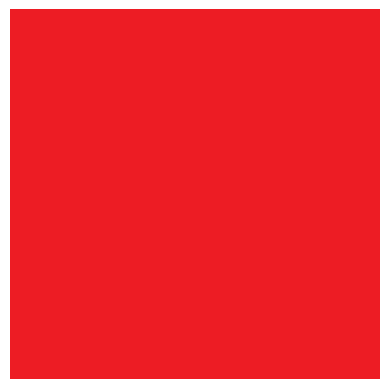

In [4]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_f = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjdlMWY0Yjk3LTQwOGUtNDg3OS1iODkyLWEzOGZjZWJmY2Q3MTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz6k2MPRAAADWUlEQVR4nO3TIQEAIADAMCAHkv7N6ECMC7YEN593nwF0Vh0AvzMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCDETQsyEEDMhxEwIMRNCzIQQMyHETAgxE0LMhBAzIcRMCLEHe0QDhbL+L+0AAAAASUVORK5CYII=

"""

img_data_f = base64.b64decode(base64_image_f)
flat = np.array(Image.open(io.BytesIO(img_data_f)))

plt.imshow(flat)
plt.axis("off")

### Edge Image : reference as "edge"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

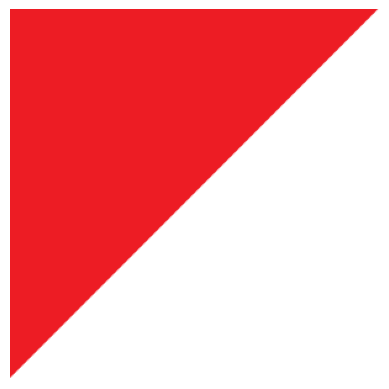

In [5]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_e = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjc3YmYzYTY2LTc4N2YtNDY5MS1iYzVmLTM0ZmUzMTgzOWYwMDwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz4ajv+YAAAJ4klEQVR4nO3T7Y9U5RnH8euc2d2ZObNnRHyARQG1amzStMbaWq2JMTFtjUZrGxqUivIsaJVWEAShQqUSjBUtkkgLWnZpu8vf1r+Bvphledp5OGfu+77uh+/n5WTOff3efLP/3fugAHAuv/++7sJcvnpVrr0ESNFSgSJChIBr1xcoRAg4lq9f152fXSpQiBBwKV+/rnv5Uj6z+oYftdYAqVm2QCFCwI1+BQoRAg4MKFCIELBtcIFChIBVQwsUIgTsydet7c7PDi5QiBCwJF+3trswl9+zZvg/HawBUjN6gUKEgHGVChQiBMyqWqAQIWBQjQKFCAFT8nvvqVGgECFgRL5mppyfrVGgECEwvnzNTHn5UmPd2pqfm10DpGbMAoUIgXGMX6AQIVCbkQKFCIF6TBUoRAjUYLBAIUKgqnxmdTk/a6pAIUKgknxmdbkw17hvvck3Db4FxM1GgUKEwIgsFShECIzCXoFChMBQVgsUIgQGs12gECEwQLbq7vK/F60WKEQI9JOturu7MNd44H7bh4gQWIazAoUIgVu5LFCIELiJ4wKFCIHruS9QiBBYolKgECHQk911V3d+1n2BQoSA9Aq8PNf43gMq14kQqdMtUIgQiVMvUIgQKfOhQCFCJMuTAoUIkSZ/ChQiRIKyO+/ozl/0pEAhQqQmu/OO7sJc46EHtYdcQ4RIiIcFChEiHX4WKESIRHhboBAhUuBzgUKEiJ7nBQoRIm7ZypXd+VmfCxQiRMSylSu7l+caDz+kPWQIIkScQilQiBBRCqhAIULEJ6wChQgRmeAKFCJETEIsUIgQ0chuXxFigUKEiEN2+4ruwqUQCxQiRAQWC3zkYe0hNREhwhZ6gUKECFoEBQoRIlxxFChEiEBFU6AQIUKUrbgtmgKFCBGcbMVt5cJcNAUKESIsvQInvv+I9hCTiBDBiLJAIUKEItYChQgRhIgLFCKE/+IuUIgQnsu63bgLFCKEz7Jut/zPv+IuUIgQ3los8Ic/0B5iHRHCR+kUKEQIDyVVoBAhfJNagUKE8EqCBQoRwh9ZWSZYoBAhPJGVZfnvbxMsUIgQPlgs8NEfaQ/RQYRQlniBQoTQRYFChFBEgT1ECB0UuIQIoYACr0eEcC2b7pRzFyhwCRHCqWy6U176buKxR7WHeIQI4Q4FLosI4QgF9kOEcIECByBCWEeBgxEh7KLAoYgQFmWdopy9QIGDESFsyTpFOXdh4vHHtIf4jghhxdUCf6w9JABECPMosBIihGEUWBURwiQKrIEIYQwF1kOEMKRoT188T4E1ECFMKNrlxfOTP31ce0eQiBBj6xX4xE+0d4SKCDEeChwbEWIMFGgCEaIuCjSECFELBZpDhKiu3Sq/+wcFmkKEqKhX4JNPaO+IBxGiil6BT/1Me0dUiBAjo0A7iBCjoUBriBAjoECbiBDDUKBlRIiBWs3y23MUaBURor9egT9/UntH5IgQffQKfPop7R3xI0IshwIdIkLcggLdIkLciAKdI0JchwI1ECGuak5RoAoihIiINKfK899QoAoixNUCn3lae0eiiDB5FKiNCNNGgR4gwoRRoB+IMFUU6A0iTNIUBXqECNMzNVX+8ywF+oMIE9Mr8NlntHfgGiJMCQV6iQiTQYG+IsI0UKDHiDABFOg3Iozd5CQFeo4IozY5OX3uawr0HBHGa3Jy+tzXU889q70DQxBhpCgwHEQYIwoMChFGhwJDQ4RxocAAEWFEJiYoMEREGIuJielv/k6BISLCKPQK/MVz2jtQBxGGjwIDR4SBo8DwEWHIKDAKRBgsCowFEYaJAiNChAGaaEyfPU2B0SDC0Ew0ps9+OfX8L7V3wBgiDAoFxogIw0GBkSLCQFBgvIgwBBQYNSL0HgXGjgj91mhMnzlNgXEjQo81Gp0zX0y98CvtHbCLCH3VaHTOfNF88XntHbCOCL1EgSkhQv9QYGKI0DMUmB4i9AkFJokIvZHnna8+p8AEEaEfegW+9IL2DiggQg/0Cnz5Re0d0EGE2igweUSoigJBhJooECJChGooEFcRoYY873z5GQWihwidy/PO6VPNX7+kvQO+IEK3egW+8rL2DniECB2iQCyHCF2hQPRBhE5QIPojQvsoEAMRoWVZ1vnbSQrEAERoU5Z1Pj/Z/O0r2jvgNSK0plfght9o74DviNAOCsTIiNACCkQVRGgaBaIiIjSKAlEdEZpEgaiBCI3pnDpBgaiBCM3onDrRfPV32isQJCI0gAIxDiIcFwViTEQ4FgrE+IiwPgqEEURYEwXCFCKso/j0OAXCFCKsrPj0eOv3r2qvQDyIsBoKhHFEWAEFwgYiHBUFwhIiHAkFwh4iHI4CYRURDlF88jEFwioiHKT45OPWG5u0VyByRNgXBcINIlweBcIZIlwGBcIlIrwZBcIxIrwBBcI9IrymOHaEAuEeES4qjh1pbd2svQIpIkIRCoQqIqRAKEs9QgqEuqQjpED4IN0IKRCeSDTC4ughCoQnUoywOHqotWOL9gpgUXIRUiB8k1aEFAgPJRQhBcJPqURIgfBWEhFSIHwWf4TFkYMUCJ9FHmFx+EBr5zbtFcAgMUdYHD7Qemu79gpgiGgjpECEIs4IKRABiTBCCkRYYouQAhGcqCJsH9pPgQhOPBG2D+5r796pvQKoLJII2wf3td/epb0CqCOGCCkQQQs+QgpE6MKOkAIRgYAjpEDEIdQI2x/8iQIRhyAjbO/b2/7Dbu0VgBnhRdjet7f93tvaKwBjAouQAhGfkCKkQEQpmAgpELEKI0IKRMQCiLC19x0KRMR8j7D17p7i/fe0VwAWeR1h6909xf4/aq8A7PI3QgpEIjyNkAKRDh8jpEAkxbsIKRCp8SvC1jtvUSBS41GErT07iwPva68AXPMlwtaencWH+7VXAAq8iJACkTL9CCkQiVOOkAIBzQgpEBDFCFu7d1AgIFoRtnZtKw59oHIa8I1ChK1d24qPDrq/C/jJdYQUCNzEaYQUCNzKXYQUCCzLUYQUCPTjIsLWjq0UCPRjPcLW9jeLox/avgKEy26Ere1vFn8+bPUEEDqLEVIgMApbEVIgMCIrEVIgMDrzEVIgUInhCJtb36BAoBKTETa3vN459pHBB4EUGIuwueX1zvGjpl4D0mEmQgoEajMQIQUC4xg3QgoExjRWhBQIjK9+hBQIGFEzwubm1ygQMKJOhM3Nr3VOHDM+BUhT5QgpEDCrWoQUCBhXIUIKBGwYNUIKBCwZKUIKBOwZHmFz00YKBOwZEmFz08bOyb+4mQKkaVCEFAg40DdCCgTcWD5CCgScWSZCCgRcujlCCgQcuyHC5sYNFAg4di3C5sYNnc/+qjgFSNNihBQIaMmFAgFVOQUCurIrV65obwCS9n9NRCNhe9hOWgAAAABJRU5ErkJggg==

"""

img_data_e = base64.b64decode(base64_image_e)
edge = np.array(Image.open(io.BytesIO(img_data_e)))

plt.imshow(edge)
plt.axis("off")


### Corner Image : reference as "corner"

(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

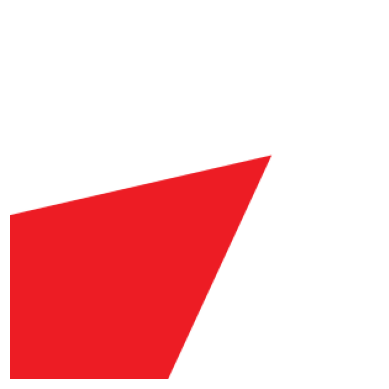

In [6]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_c1 = """
iVBORw0KGgoAAAANSUhEUgAAASwAAAEsCAIAAAD2HxkiAAAACXBIWXMAAA7EAAAOxAGVKw4bAAAEvGlUWHRYTUw6Y29tLmFkb2JlLnhtcAAAAAAAPD94cGFja2V0IGJlZ2luPSfvu78nIGlkPSdXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQnPz4KPHg6eG1wbWV0YSB4bWxuczp4PSdhZG9iZTpuczptZXRhLyc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpBdHRyaWI9J2h0dHA6Ly9ucy5hdHRyaWJ1dGlvbi5jb20vYWRzLzEuMC8nPgogIDxBdHRyaWI6QWRzPgogICA8cmRmOlNlcT4KICAgIDxyZGY6bGkgcmRmOnBhcnNlVHlwZT0nUmVzb3VyY2UnPgogICAgIDxBdHRyaWI6Q3JlYXRlZD4yMDI1LTEyLTExPC9BdHRyaWI6Q3JlYXRlZD4KICAgICA8QXR0cmliOkV4dElkPjhkYWIzZjdhLTU0NDMtNDIwMy1hNWQ0LWY2Zjg1YTcyNGZlZTwvQXR0cmliOkV4dElkPgogICAgIDxBdHRyaWI6RmJJZD41MjUyNjU5MTQxNzk1ODA8L0F0dHJpYjpGYklkPgogICAgIDxBdHRyaWI6VG91Y2hUeXBlPjI8L0F0dHJpYjpUb3VjaFR5cGU+CiAgICA8L3JkZjpsaT4KICAgPC9yZGY6U2VxPgogIDwvQXR0cmliOkFkcz4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6ZGM9J2h0dHA6Ly9wdXJsLm9yZy9kYy9lbGVtZW50cy8xLjEvJz4KICA8ZGM6dGl0bGU+CiAgIDxyZGY6QWx0PgogICAgPHJkZjpsaSB4bWw6bGFuZz0neC1kZWZhdWx0Jz5VbnRpdGxlZCBkZXNpZ24gLSAxPC9yZGY6bGk+CiAgIDwvcmRmOkFsdD4KICA8L2RjOnRpdGxlPgogPC9yZGY6RGVzY3JpcHRpb24+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczpwZGY9J2h0dHA6Ly9ucy5hZG9iZS5jb20vcGRmLzEuMy8nPgogIDxwZGY6QXV0aG9yPmtyaXNoamFpbjIzMjE8L3BkZjpBdXRob3I+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcD0naHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyc+CiAgPHhtcDpDcmVhdG9yVG9vbD5DYW52YSAoUmVuZGVyZXIpIGRvYz1EQUc2aDZOaWJFOCB1c2VyPVVBRnlwb09iWGlJIGJyYW5kPUJBRnlwbXlrMFQ0IHRlbXBsYXRlPTwveG1wOkNyZWF0b3JUb29sPgogPC9yZGY6RGVzY3JpcHRpb24+CjwvcmRmOlJERj4KPC94OnhtcG1ldGE+Cjw/eHBhY2tldCBlbmQ9J3InPz7b9SPRAAAMEElEQVR4nO3d629UdR7H8XOd82taaIvA2houcjFKSQAlTYNazYIiCoQSKtY0BUpbWtz/bpN9tFl1N6vrdmYKIt6X9bIr3nZxFUXomZl9QEMBK51pZ+Zzzvm9X08V+onNu8e03864lUrFAaDjqQcAtiNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0JAjAgBMSIExIgQECNCQIwIATEiBMSIEBAjQkCMCAExIgTEiBAQI0IIlL/86sbv/1C5dk09JBEC9QBYoVIqld77IM4X4vxMnC+U//1F0Ls7d+h59a5EIEI0SuXq1bh4Ls4X43wxnjlXufrj7f+05XeTqmFJQ4Sop9Ln/4qnC3FhJs4XSu9/6JTLC/5r/tYt4dP9Td6WWESIZanEcenCxbnHXb5Y/vrrav6UOTvhuG6jt6WFW6lU1BuQMuXv/hcXinFhJp4uxOffdq79XNMf97rub3/jVTfgATCH/xCoQqVS+ucn8/+f+fElZxlfu6OxkxR4O56EWFjl+o34/NtxvhgXinG+WPnvlbr8tW5He8ebr7ltbXX527KBL0iYV/72P3PVTRfjC+84N27U/UNEwy9T4F14EtqtXC599HGcL87e/LbKJ5829sMZ0/HGq96a1Y39KGnDk9A6lZ9+imfOzz3xCucq33/ftA8dHRugwF8iQiuUv/wqni7MFopxvli6+J4Tx4IRnmcmRgUfN/GIMJt+eSamXuTknt/vP7hRvSKJiDA7Kj/8EBfOxYXibL4Yz5xzfvxJvegO5pUz6gkJRYTpVuWZmFywpy/Y3qNekVBEmDKV2dnSO+/WeiYm13J2Qj0huYgwBcpXvrv5E/M4X4zPv+38fF29qDb+tofD/ifUK5KLCBOprmdicmaKc+17IcKkqFy/Hp+/UPczMTlv/brcwQPqFYlGhErlb7699VOE+MJFZ3ZWvaj+DOfai+FsrbmafCam5nZ2drz1utvSoh6SaHyJajjhmZicOTlMgYviSdgQ5ctfxtOFm4+70rvvOaWSepGCMR1vve6tWqXekXQ8CesjgWdictHQIAVWgwiXLuFnYmK+b06fVI9IByKsTenTz25dq5Q+/CixZ2JyuYMH/A3r1SvSgQgXkdIzMTkzxZ1atYhwAeUrV+LCTHrPxOTCJx8Peh5Rr0gNInQc5/YzsWL890Lp0iWH7xkvA7+1VBN7I8zqmZicv31buKdPvSJN7IrQhjMxuZazZzjXrknWf1h/60xsuhBPF8qffa4elHHe+nXtf/mj6/GWezXI4JPQ5jMxOTNxmgJrlZEnYfmLy7euou09E1NzV9/X8carHIvWKq1PwvkzselCPF0sX76sXgTHnOBceynS9CTkTCzJ3NbW9jdf8zo71EPSJ+lPQs7E0iI6fowClyZxT8L5M7Hp/Gy+WPnmW/UiVMH32//6J/+BbvWOVErEk5AzsbTLHTlEgUsmirBSKf3j0q134eJMLN1cXlZ0WZoX4fyZ2HQ+LsxUrnzXtA+Nhgqf6vcf2qpekWKNjZAzMRtwrr1MdY6wUi6XP/hoNl+ICzOcidkg2LUj7OtVr0i3OkQ4fyY2XYiLM5Ufri7/70Ra8Mu7y7fECDkTg+M4/uZN4f596hWpV22ElTguvfv+re9nciYGx3HM+CnOtZfvXj+sv3kmNnvzPnPmvHPtWjOXIeHctWs63nzNzeXUQ1Lv7ichZ2Kokjl9ggLrwi1fv1565+LsdLFUKHImhiq5ba3tf/uz175SPSQLgis9j3ImhlpFw0MUWC8eBaJmYWhOjahHZAff2kLNooHDXneXekV2ECFq5Dpmalw9IlOIELUJ9+31t2xWr8gUIkRt+K2luiNC1CB4bFew+1H1iqwhQtTA8BhsACJEtfzNm3LP7FWvyCAiRLXM1DhvMtEIRIiqeF335wYOq1dkExGiKtGpEc61G4QIsTh35QozPKRekVlEiMVFI8Puijb1iswiQiwmDM0o59oNRIRYRDR41FuzWr0iy4gQ9+R5ZnJMPSLjiBD3Ej67139wo3pFxhEh7oVz7SYgQvyqoK832LVTvSL7iBC/isdgcxAhFuZvezh8ul+9wgpEiIWZ8VHOtZuDCLEAr7srd+SQeoUtiBALMBOjbpCIt1K3ARHibm5He3T8mHqFRYgQd4tODLttnGs3DxHiTsaYE8PqEXYhQtwhepFz7WYjQtzG88zEafUI6xAh5uWe3+9vWK9eYR0ixDzzyhn1BBsRIeYEe/qC7T3qFTYiQszhXFuFCOE4N8+1+59Qr7AUEcJxHMdMTXCurUKEcLz163IHD6hX2IsI4Zixk5xrCxGh7dzOzuilQfUKqxGh7czoiNvSol5hNSK0mzER59pqRGi1aGjQ6+xQr7AdEVrM980ZXl1bjwjtlTt4wH+gW70CRGgt1zFT3KklAhFaKux/Muh5RL0CjkOE1jJT4+oJmEOENgp27gj39KlXYA4R2shM8OraCUKE1vE2bghfeE69AvOI0DpmYtT1+LwnCJ8Mu7ir74uODahX4A5EaBfOtROICC3itrZGwy+rV+BuRGiR6OXjnGsnEBFaw/fN2En1CCyACG2RO3LI6+5Sr8ACiNAOLi8rmlxEaIXwqX7/oa3qFVgYEVqBN5lIMiLMvmDXjrCvV70Cv4oIs49f3k04Isw4f/OmcP8+9QrcCxFmnJka51w74fj0ZJm7dk1u4LB6BRZBhFlmxk65uZx6BRZBhJnltrWa4SH1CiyOCDMrGh5yV7SpV2BxRJhRYWjGTqlHoCpEmE3RwGHvN2vVK1AVIswiz+NlRVOECDMofOa3/pbN6hWoFhFmUMskj8E0IcKsCXp3B7sfVa9ADYgwa8yZ0+oJqA0RZoq/dUvumb3qFagNEWaKmRzjTSZShwizw+u6P3fkkHoFakaE2RGNneRcO42IMCPclSvM0HH1CiwFEWZENDLMuXZKEWEmhKEZHVGPwBIRYRZEg0e9NavVK7BERJh+nmcmx9QjsHREmHrhs3v9BzeqV2DpiDD1eJOJtCPCdAv6eoNdO9UrsCxEmG48BjOACFPM3/Zw+HS/egWWiwhTzExNcK6dAUSYVl53V+7gAfUK1AERppWZHHODQL0CdUCEqeR2tEcvDapXoD6IMJWiE8NuS4t6BeqDCFPIGM61s4QI0yd68ai3apV6BeqGCNPG980Er6eWKUSYMrkXnvM3rFevQD0RYcrwJhPZQ4RpEj75eLC9R70CdUaEacKra2cSEaaGv31b2P+EegXqjwhTo2VynHPtTCLCdPDWrwtfeE69Ag1BhOlgJk5zrp1VRJgCbmdn9OJR9Qo0ChGmgBkd4Vw7w4gw8YyJTgyrR6CBiDDpoqFBr7NDvQINRITJ5vvmDK+unXFEmGi5gwf8B7rVK9BYRJhgrmOmeFnR7CPC5Aqf6g96HlGvQMMRYXIZXl3bDkSYUMHOHWFfr3oFmoEIE8qc5dW1bUGESeRt3BDu36degSYhwiRqmRxzPT41tuAznTju6vtyg5xrW4QIE8eMjri5nHoFmocIk8Vta41GONe2CxEmSzR03GtfqV6BpiLCJAlDM3ZSPQLNRoQJEh055HV3qVeg2YgwMVzHTPJbSzYiwqQI9+31H9qqXgEBIkwKMzGqngANIkyE4LFdnGtbiwgTwUzyXkv2IkI9f/Om8Nm96hWQIUI9MzXOubbN+NyLuWvX5AYOq1dAiQjFzNgpzrUt938/QsaulMkBUwAAAABJRU5ErkJggg==

"""

img_data_c1 = base64.b64decode(base64_image_c1)
corner = np.array(Image.open(io.BytesIO(img_data_c1)))

plt.imshow(corner)
plt.axis("off")

### Multiple Coorners : reference as "corner2"

### Bonus Question Image 1 : reference as "ball"

(np.float64(-0.5), np.float64(625.5), np.float64(416.5), np.float64(-0.5))

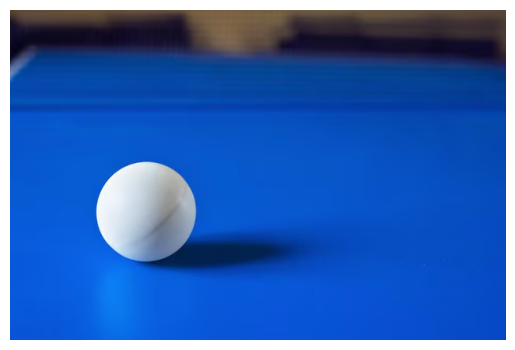

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """
AAAAHGZ0eXBhdmlmAAAAAGF2aWZtaWYxbWlhZgAAAOptZXRhAAAAAAAAACFoZGxyAAAAAAAAAABwaWN0AAAAAAAAAAAAAAAAAAAAAA5waXRtAAAAAAABAAAAImlsb2MAAAAAREAAAQABAAAAAAEOAAEAAAAAAAALGwAAACNpaW5mAAAAAAABAAAAFWluZmUCAAAAAAEAAGF2MDEAAAAAamlwcnAAAABLaXBjbwAAABNjb2xybmNseAABAA0ABoAAAAAMYXYxQ4EBDAAAAAAUaXNwZQAAAAAAAAJyAAABoQAAABBwaXhpAAAAAAMICAgAAAAXaXBtYQAAAAAAAAABAAEEAYIDBAAACyNtZGF0EgAKChhmJx0DBAQ0GhAyihZEUABBBBBQ2WfBwhFFZS9/yvOSDUcKgNFwLnyonvtFi+5a/QZ2a5dK1fpgl/G4ZJu3yEa+X3UKKp4o53grMlT0TC2PvqbIqilwYa64APino8Q2cPzUSPn32BMu6bOBRvDbxgSHVq8sVxHinxnLumOMj1kJ+GpSMN441qnggvE3uFj1F7m/9XBC4wm+gLlBX2wFSr8aX16EXHbaKrh64QXYB3rK04pOFDRTpokReMNDq0jAFhVfQKRBTLqt364ntR59dLVEWSyBfVOnOqSR1aas4M/o2j1fZl9IAhnsd8EjiALsMY88/1PHxTbjwdFCC4XIMzBI2u9CCFDVjSTMWgzAYcVuiuR3dOhSDsJK2gvaXKEoJj0YOnbilz/DTBgaCKrcn0FPm8O9gXLw+Ir/wnsj8udOP//fpjmHjvUgLEiVoMITYzJjeJAhOJoyixrIbj2232UkGdjxeLfvYo4HuCwJl6qhDXGVcNL4+Eqdads3rzFVde+oRvuGJiseeoIEqYjipnFSiQendMRB4E7GB0y4pOkWQrRVCbtbNYh56VYkOHwcNrWDB5h5RWPwcaX5cTbLx4OhQ0biUbcWZ5ubupVvGzqI5qYkEMiFdm1m82uFnhlhECdoqNLuEzoF8raVM7LK5Lxevnu4ncYZthlmTk+5rp/Hl1t77jnXAK+pIBVfSaUP8seaBW/H+0He3MweC6Ctg+BS6EEeLq+J+Fy2TkCM0ozrhwOT47R94/XHajq2IYHNDUpdxYGew+pwvyz8QB/1w1sG2MOhFP5zm9Wr+HGSuyTrfcvT5a7QxCd1wygOXd3vrtFSMRIQTBsFxpUmCiN1hfE1il1iQPxYYba/HX80A6NxHaF1arZ2qIZHx14g96ECdzgFIbBx/qX5njyKqotbdPZBNCkK34/wkYJLP/ezexoc6tC/Z2LwClkgv3qmfkrDC1+ZQ7CaIlufQlhZlhqCpik3iXD8vItqAsDL5CfnF+MhPYVMkX/qy2bfAxe1eoGqiYXZEeKA3wIF888EKsR8stS5VctCwkpXe1WT2BfEsnsPRwDaBdbpIo/HlkRVOcJXoTna1EW1REoHnnE9c3tai8McAzebyYzqPX9ryEoXr0FQZMkxcq0jyVksWvmTfjB+EeZDELQ3LFRqe3iix5vTbf3fnsg6VbBMkgS+ww6zzu6gDY4Qaqu/bjIhi1WwkMQnI8iJjILpMlb+M7jLPpT+XncSAlfUwoi1ItpRPZoPibkmUYhN20BYzJXUJOc/ywJUtJJTqtHf3aGrVdgHaIA8DiEjrYGyjzyB/0pDhLUFY51LWY6sIg0Oy1hPPJTBeAe7Xk4btlpgfolZwKB12yliLHMBTWdlOQxY4tca2NzLJI1hmo3QOu/cCC2UEHtwok5OeiUmar3Wgijh7QZvwUcJEQ/0pVVZeRMpqVJ6ZoMkL5WtgtKwWCeAkpCPlz+E773jqavowiylITsUQHcP6Yx1WGqDNdr8UgATeI11ur5N81VVjme3cYPgUzGUwx+GIJb2K4R1uPbLB8OJ7M79tSz8USntyYT4i3K3novfd3PAN4LKAH1tiQXSdnSX3fK61779BrDUePPnEuq9epHIovQieO+cpcvOxET1loFpjTjSkCcwjCZMJqQO0F/+xQvmlqMcihNlidNYvNREH1CZJh/A8WSHzIA3erDFcjeA52JNKH79Pu2ntCsPW0B9HwSL7bgqJ34WHaxmXMEOvFiCpfqn5Ddi3J9ugCBIPMXVrOuGJFEuEvRWsmd4ytF2nchc5WwoQRk5Xw+1mLJy6zBo+4zM0bD/RSXMGNkMEBUPgrM8gvpPqveNOzwoF2hHbZwO5k5P2IIok0XtlXZ92w7uI25+NlTsafpmUYfaUCNahk5pI6FCSmEKgA2jyjYZZY9XCQBh+xDdLP6CsA14cqY5Sdi2ihhbiNNXtHlB8MHh9rjGt+HCKt1ek+CF4hgAvBhvKxaxA5XpXfaxLKoeAGo5ASLO0J3IIcea1zQmGmjf/kHR3SD1QjBSn0aNhsIihAOzL6Tr2flzEwQFt57RUKWrKEycr3yZn8ynz3lt+zr2YN4yPru80l1aOQZd+Kkk4OClzrrJl/Gua5FeMF34w3fMbNfFHyk0VRmn5rQYzFCi7nBFvZqbaRzzC0KfXrFNCcl8isWmaJ4/kOPqPmi5JGksnwj3b4OgBcsznlCfjRPVCyJRfRKhNUOq3RRybSWh1MeSFbjObIsa4qaPiG1chUCFySyMXn3/n+5Mk40XGX/vZM3hsPIY+peh+CdNFt06SuUx+hWhmGQjJ8TY4BShkbABmQ2WMVNMnRPTwA3OQ+1Lmk8LyOeiKRXFOBT7mYRbjEYP0g596YjBZAlq8UHfLbutmxcl+fSaj8NNdbVRud7WqigUiM0cMqPVPeLacteyLj8kjNdBSnV5ovVsXEx8mjh5rPV6/tdtppKz4uWUIe583UttU1PdSyksdbNk12FsXHtFx1YwDDuvGZOR7u5aY3jQ3hxedv/DqA+vWuRdFNhi40EDZK9+6xvv9G7CpINIZ2bkhpz8Yh/pdKTqnWoY/etaD/mrSWnW83nMl0OMHuNrh8jczL/XOQiFhxZBEU4ImhC0e/0MVwidZ+BjTQWK3ZHajjPtkNZd5gqeHxcLgY3f1QKwgq5L6WkuH2t1ykmVKrdCCw6vRZLsQop38beZpolim9n5zs2PNNAC+zDQ06gVEvIvlmf7PFwXTd8RAgdeYdrukXeJaO+7UD20bSj+3AIwNIiB0vEtTgApi8in4efm6glWv8Wv4bAg/T/CXZXc26+iGveSa8nx1ujsfPo6odJErJsavCzImRS+RaZoqSsjprT1tPQWMQsadQ3S+OsGsnRHUGJJt7uWQy6t+EW1H1F187lBcFq/Jq0hAALauvBpoM+h57Xo6WHFhUuAsAAqRWErM/1HhzinDYfH1lSjwmn145nNBKf6Tt38i05ZcX/JpJHmX4nCh8/tIgaN/V99hgRKK4JcyE6nn6IXkEqtSZNlwN7qB9QFG1vA7SvdlNkeUk9p2U4hBxrH5S7CFORXlY9J5CalOrX4c3PhkRjDcNGCuU28g0oqDLfRQRaS6svm7nPycb/jqqx0DI7I+P1mRkrdFQCB5VrXhFsgq+vFVUe7/IIUAKyn9YLiW3rFvt5GwxGaj72WsRwSZeJPNOGQ+mRmLHyTOir5MQKNd9suBig6ZFZo5o9J7cBDaoNybTAUmWj5dmRhoKP/+ctfn37MNoHKy1WItJl8j1jV0uhJIQP0iguKh3Cy4rvsSunwCvLdRiuVF+w478DI+1t5s6FyJE9WhF3zLsMOzaBerNuzIuvRjHGAWBmDSE5Cx+RtOzkHiKYIZZIislfc6JX49OQ22T83pdNOGgOeLkxTS0lIh14fbWLpbgQJSe0mjXynXvMhLuOoiAGuCeM8yN/p1OY2/YRHn3pQ6UO8Qy59liqK/Feitgurv+wUK/N40/Xryd2EOMUWEE2Gp/Sd3/2I21R1SMTGtCmP4YJhqIy9fEyH6foHlB9bjVuQ44ERzQ2T+/YXLhMOCCfPUVgqK0MvwsFte2NBtHT5MLFmIlJyP2zXm2OxmHP8LBAlUocZPDcB/7QObXwEWbAGgvz+qSzheBzlyzg/INEWghMnG4C+inavW6tCie26WkVSJdtVRYiVS2/SiblNwezK8jcUcQ31ENEf5OjKGmxO5tE4c/w0jHatDsoSpObks1W6FmdFf13rHNabC2DbIdjD+jEipnZhhHFVRv/U+gKonx0PDkTMSJs=

"""

img_data = base64.b64decode(base64_image)
ball = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball)
plt.axis("off")

### Bonus Question Image 2 : reference as "ball2"

(np.float64(-0.5), np.float64(642.5), np.float64(359.5), np.float64(-0.5))

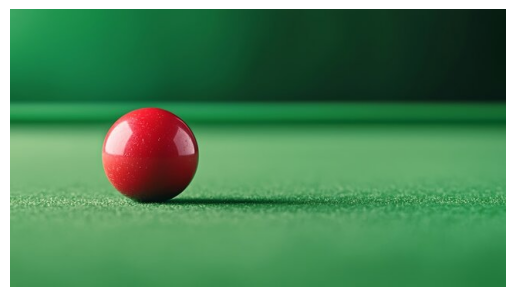

In [ ]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np
import cv2

# PASTE BASE64 STRING HERE
base64_image = """
/9j/4AAQSkZJRgABAQEBLAEsAAD/4QBWRXhpZgAATU0AKgAAAAgABAEaAAUAAAABAAAAPgEbAAUAAAABAAAARgEoAAMAAAABAAIAAAITAAMAAAABAAEAAAAAAAAAAAEsAAAAAQAAASwAAAAB/+0ALFBob3Rvc2hvcCAzLjAAOEJJTQQEAAAAAAAPHAFaAAMbJUccAQAAAgAEAP/hDW9odHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvADw/eHBhY2tldCBiZWdpbj0n77u/JyBpZD0nVzVNME1wQ2VoaUh6cmVTek5UY3prYzlkJz8+Cjx4OnhtcG1ldGEgeG1sbnM6eD0nYWRvYmU6bnM6bWV0YS8nIHg6eG1wdGs9J0ltYWdlOjpFeGlmVG9vbCAxMS44OCc+CjxyZGY6UkRGIHhtbG5zOnJkZj0naHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyc+CgogPHJkZjpEZXNjcmlwdGlvbiByZGY6YWJvdXQ9JycKICB4bWxuczp0aWZmPSdodHRwOi8vbnMuYWRvYmUuY29tL3RpZmYvMS4wLyc+CiAgPHRpZmY6UmVzb2x1dGlvblVuaXQ+MjwvdGlmZjpSZXNvbHV0aW9uVW5pdD4KICA8dGlmZjpYUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpYUmVzb2x1dGlvbj4KICA8dGlmZjpZUmVzb2x1dGlvbj4zMDAvMTwvdGlmZjpZUmVzb2x1dGlvbj4KIDwvcmRmOkRlc2NyaXB0aW9uPgoKIDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PScnCiAgeG1sbnM6eG1wPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvJz4KICA8eG1wOkNyZWF0b3JUb29sPkFkb2JlIFN0b2NrIFBsYXRmb3JtPC94bXA6Q3JlYXRvclRvb2w+CiA8L3JkZjpEZXNjcmlwdGlvbj4KCiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0nJwogIHhtbG5zOnhtcE1NPSdodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvbW0vJz4KICA8eG1wTU06RG9jdW1lbnRJRD54bXAuaWlkOmMwNDBjMzFiLTljODItNDM0Yy05ZWM3LWVjYzBhZjdiN2RmMzwveG1wTU06RG9jdW1lbnRJRD4KICA8eG1wTU06SW5zdGFuY2VJRD5hZG9iZTpkb2NpZDpzdG9jazoxMGFlZDBjMC1iNGNlLTQzMGUtYTBmYy04YTAzMzM1ZTZhNmY8L3htcE1NOkluc3RhbmNlSUQ+CiAgPHhtcE1NOk9yaWdpbmFsRG9jdW1lbnRJRD5hZG9iZTpkb2NpZDpzdG9jazoxNTcyMjU1NTMwPC94bXBNTTpPcmlnaW5hbERvY3VtZW50SUQ+CiA8L3JkZjpEZXNjcmlwdGlvbj4KPC9yZGY6UkRGPgo8L3g6eG1wbWV0YT4KICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAogICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgCiAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAKPD94cGFja2V0IGVuZD0ndyc/Pv/bAEMABQMEBAQDBQQEBAUFBQYHDAgHBwcHDwsLCQwRDxISEQ8RERMWHBcTFBoVEREYIRgaHR0fHx8TFyIkIh4kHB4fHv/bAEMBBQUFBwYHDggIDh4UERQeHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHh4eHv/AABEIAWgCgwMBIgACEQEDEQH/xAAcAAACAwEBAQEAAAAAAAAAAAABAgADBAYFBwj/xAA8EAACAgEDAQcCBAUDBAICAwAAAQIDEQQSITEFExRBUVJhFSIGMmJxByOBkaFCscEk0eHwCBYzcpKi8f/EABwBAQEBAQEBAQEBAAAAAAAAAAABAgMFBAYHCP/EADMRAQACAgEDAgMGBQQDAAAAAAABEQISAwQTIQUxFEFRBiIyUnGRFUJhgcEHofDxJGKx/9oADAMBAAIRAxEAPwCuRVJjSkVtnjP5lZZMrk+BpMqmysSSRXJjSZXJhkkmVtjSEbDMg2IwtisIArCxWzSlZW/MdsrYUsmVyHbK5MsNYlYrCxWV0grEYzFfmWG4VyFbGkI+hpuCgyFihuEIAgapCEIKWkAwsBVKxQsVhYBiSYwkvMNYkbKpeZZIql0LEO0EYkh2Vs06YkkyuTHl5lbNOkFYjGfmIw64lbEyFisrpCZBkAMinSBJFijBRIAmQyIM8EyQEFbFbGYjDZWwZIxTSjkmQECjkmQeZAoisIGFgrYA+QpYbgBQsU1CowMDIAMisIrLDeKZJkAGGoTIrYRWIUsmI2NLqxPI1DUADJGAAMBAEEIDJAP1I2VyYHISUuDyn4C0lIplIMpFUpBi0kytskmVtlpEb6iNhbEbCBkVsjYrKQjYjYWKwoMST8gtiNliFiCsRhbEZWogGxQtilpuIQrYzYjLDcFZWx2VtlhuAbFIDJXSEyQgMkao2QZFyDJVNkGRWyZAjyBkyK2GkZXLoO+hW2IbxgkiuQ0mIzUOkEYjGYjZqHTFXIrY8mVsrrjBX0EYzEbDrBJdBQvoKyukIKwsUNwKCgECwYgEEIhCECQViMdiMNQSQoZCs01CBAQNIEBAD5A8iepAFYjGYr8zUOkFFY3kKyqAoWDyKQDfAoWAOkIBk6IDI1CMVhFZoJIUZisrQYFY3kKwFYGFgIAQhAtP005FcpCOYjkeU/nlmcityFlIrcixCGbK2yNiNlhKFsXIGxXItKORcgbFbLRQtiNkbFYpUYjCxWy0sQVsRjNlbZadMYBgbIKw3CMRhbFbKsFl0K5DSfIj6ldMYBihYrYdITIuQNgyFHJAAyVYgckyDIGw1ECAGRcimohJMRsjYkmGoCTK2xmJJm4hvGCvoVy6DsrkyusK5MRsaT6lcmHXGCtiNhkxGyw6xAZAQAbxgGDAWDJW4RBAgkBXQIpEASAJkoDFYWxJMLBWKF+YCtQgAMGStRBshQqYUQoQEA2IIB+YoRWahuCsUZilUAeRAMrWJSIhA2DAw+YMiFKB9AsWXQpBGBhFK0DFYwrCgxWEBEAgSBp+jHMRzK3MRyPMp/OljkK2VuQrkWiljkK5FbkDJaWjZA2LkGSg5BkDYMlpRyLkgrYWIBsRjNivzK1EFYjGbEbFNwDFbCxGwsIxJMLYjZW4gsmK+gX1FYdIgrFYWBlbgoMkbFzwIWIHIMgyTIbiByDIu4GQ1QtgbBkVsrUI2I2FsRlhYgGxGFsVmm4gGUyZZJ8FMmHSIKyuTHbKpMO2MEkxchbFK64wgCEK3EAQhAqIICCAUyAICkyBsjYjZVFsRsjYrYWIRgIAQ1EAAjYDTZkEVDIgiAwgYhIBisIrLDZWKwsDNQAK+gz6CNhrEA+QEQNgAmQMQqCSYzfBW2ahYAVjPoK+gagGKMABWALAREIQgW333eBzKNxNy9Tz6fz6lu4G4q3A3CiljkTcypyBuKuq3IMle75JkGqzJNxXkmSxC0ZgbFyDJViByK2RyEbCwjYuSZFbDUQDYjCK2KagGxGxhGWm4gGKw5EZW4BithbEbFNxAPoI2FsRsrcQLYMi5JkU1ECTIuQZCmbFyBsGRCxCNitkYjeStwgjC2JJlbgsmVtjSZWw6YwWTKZMebKmyw74wGQEIWnWIQBCFWAJkBApgAJkA5BkGRWwC2K2DIMhYhMgyBsBYhuIHIM8AAVqITJCECogpgRAg5B1IQLCMRhFZVAULAygMRjPzFEN4p5CsIBDSCthEbKsI2KRkK0ArGFYWAYAgADFGYCIBAkC0+27vkm75M+/5JvPhfhNV+/5BuKd4N4WMV+4G4pcybxRS7cFSKVL5DuLSUu3B3FKkTcDVa5C5E3AyKWIO2LlC5F3Foo2RWwNgbFNUjYuQNgbKsQjYjZHIRsrcQjYrYGxWw3EI2I2RsrlIrcQLYjkByEchTpEGyTJXuBu+RTUQfJMleSZC0fIGxNwMlaiDNi5BkVyDUQLZXJkcsiNhvGAbEk+oWyuTDrjBZPqVsZsTJqHbGEB5kYCtiBkyLkKIMgbJkA5A2DIMgHIrZMi5LELECLkmRclpuITIMkIGkRAZJktKIMkyAEGIDJMigQNkbFbECNitkbAFADZBWVqIBshAZDaMBBSiNiBbFyWG4QBCFEyKwgCwUhCEAYBgYIgEIQD66pfJNxQphUz4n43VduJuZVuBuBqu3Mm5lO75JkGq5SwMplCYykE1XqZNxQmFSFM6rtwN3yVbibimq3d8g3FW4m75LS6rNwrl8le4VyKsYrHIVsrcxdwajE7kK5CbhHItNRCxyEchHISUytRiZyK5SFciuUg6Y4mchHIVyEcg7Y4n3E3Fe4G4NRit3EyVbibguq3cByKtwMhYxO5CuQjYHINxiZsRsVyFchTcYjKRW2RsVs1EOmOKNi5A2LkrpEDkGQZBkUpsgyLkGS0GBkXKBuFLRmwZF3Aci01GJsiti5BktNRA5ILkGfkNRBsgyLkGQpskyLkhQyZMiZJkUHTJkXJMigcgyDIMgFi5I2DIWIQVsjYobgWLkmQNlWEbFbI2KyxDUQjIQBaVOgCMDCwjB5EAFQhAZAIAEFJQogCEofUts/aybZ+xnbfRIehPokPQ+DaH4vdxSjZ7WFRn7Wdr9Eh6E+iQ9qG0G7isT9rJtn7Wdr9Eh6In0SHoibQbuL2z9sv7BSn7Wdl9Fh6f4J9Gh7UXaE3cdiftZMT9rOw+jQ9AfRoe1DaDdyGJ+1gxP2s6/6PD2gfZEPQu0JvDkcT9rA1P2s676TD0FfZMPQsZQvcci1P2sXE/azrn2TH0FfZUfRf2LtB3Ici1P2sVqftZ1r7Kj6ID7Lj6IbQvdhyLU/axXGz2s619lx9qEfZkPRF2hY5ock42e1iONntZ1r7Ogv9KEegq9ENmo549qck4We1iOFntf8AY6/6fX7f8EXZtbeFEbw775xFzjNfo4112e1i93Z7Wdt9Jg/9CJ9Ij7EN4SOrxcR3dntYO7s9rO3+kR9iB9Ij7EN4WOsxcTss9jJsn7Wdq+yIexA+kQ9iG0LHWYuK2T9rBtn7Wdp9Ih7ED6RD2obQsdZi4rZP2sVwn6M7Z9jw9iF+kQ9iG8NR1uLiXCz2sXu5+1nbvsiHsQv0iHsRYzhqOuwcQ67Paxe7s9rO4fZEPYgfSIewdyGo6/Bwzrs9rFddntZ3X0mHsB9Jh7P8DuQ18fg4V12e1g7qz2s7r6TD2IX6RD2Ivdajr8HD91Z7WL3VvtZ3P0mHsJ9Ih7EO7Cx1+Dhe6t9rB3VvtZ3X0iHsRPpMPYO7DXx+DhO5t9rB3NvsZ3n0mHsB9Jr9g70Edfg4PuLfYwdxb7Gd79Jr9hPpNfsQ70L/ABDBwPcW+xk7i72s736VX7ED6TX7ETvwv8QwcH4e72MHh7fYzvfpVftQPpVfsQ70L8fg4Pw9vsZO4t9rO7+lV+xA+lV+xDvwfHYOF7i32sHcW+07r6VX7UD6VXj8qHfhfjsHDdxb7Sdxb7Wdw+yq/agPsqv2ovfhY63BxHcW+1g7i32s7b6VX7UT6VX7UO/C/G4OH7i32sHcW+1nb/Sq/agPsmHtQ78LHW4OH7i30YO4t9rO3+kw9qB9Jh7UO/DUdbg4juLfawOiz2s7j6TD2oX6TD2l+IhY67Bw/h7fRg7i3H5TuH2TD2g+kQ9o+Ihr47BxHcW+0HcW+1nb/SIeiA+yIe0vxEHx2DiO4s9oO4s9p2/0mHt/wL9Ih7R8RCx12Die4t9GDuLPaztvpMPRA+kw9qL8RC/G4uK7mz2sXuLPadr9Jj6IH0mHtHxEHxuLi+4s9rJ3Fvodn9Jj7SfSY+g+Ig+NxcZ3FvoQ7NdlR9EQd+F+NwfaldH4Iro+qOY+pr3/AOQ/VI+88x+M2y+jp++iTvYHMLtRe4n1Ne4G+TqO+h8A76Pqcx9UXuJ9TXuRTfJ03fQ9Qd7D1Oa+pr3E+pr3A2ydI7oA76Hqc39TXuB9SXvBtk6N2w9RXbH1Oe+pL3/5B9SXu/yVLy+joHbH4FdsTwPqS93+SfUV7ha3k912x+BXZE8L6gvcgPXr3Fs+89t2xK5XR9TxXrv1GvsTSa7tnVdxo4vEf/yWNfbBfPz8C68y+npek6jq+WOHhxnLKfaIaZXptRjy3wklyzbR2XqrYqd77iD6JrM3/Q6fsj8O0aGnMIOdjXNs1mUv+y/Y0vs2e9Rnc6J7koyk3iPXLbXTnBwy5s5/BD+y/Z7/AEz6bDGOX1TO5/Lj7f3n3n+37uRlpNLU1GEHdLOPvec/06Ga/UbJ7ILZHP8ApSR7XakNTTRXqbI2TjF93BxXEXjhZXnz06nNam6vDteoza3lwcG3/V9D5cpzn8Uv7L6R6F6V0eH/AI3Bjj+kXP8Aeav91GrtlY5tSntXLTeeDy725y2JvPlmWMGnV6mU2t0m4dPtWOPQ8+21KWcuOOU11+Cw9jlx49anGFPjtdpvuq1FiWfyy5X+TVpPxXKuW3XaZOPvq/7M87U3RzKScrJTi97sin9z6tf18+p5tzy3z1Pp48pfgvWvsp6R6jE93hiMvrHif3j/AC+iaDXaLXU97pboWR88dV+68i/Mfg+Yadzp1Eb6NRZp7PKyH/Pqvg6nSdr6iuNUO0Y1wVvFWpreabX6Z/0y+GfTFzD+I/aX7C9T6ZE83TTvxx+8fr9f1j9nTZiD7Pg8rxmOG8A8avcTZ/P/ALz1cR+CfZ8HleOXuB46PuG0n3nqNRFxD4PM8dH3A8dH3DZPvPTxD4FxD4PN8bH3A8bH3DZayeliIuIHn+Nj7geNj7kNpKyehiIuImDxscfmB4yPuGy1k34iDETB4yPuB4yHuGyxGTfiIMR+DD4yHqDxkPVDaViMm7ESYR5/jYepPGw9SbStZN/AODB42PuQPGx9UW5Wsm/EQfaYPGw9yB42HuQuVrJve0H2mDxsPcDxsPcTysRk3NIGEYfGw9wHrYe4vldcm7gHBg8bD3E8ZHH5kPK1LfwDETB4yHuB4yPqTy1ES3NIVpGLxkPUHi4e4vlaltwgYRj8ZH1B4yOOoqWvLZhAwjH4yPqTxcX5ipPLXhEwjH4uPqDxcfUayvlswiYRj8XH3E8XH1QqSLa8IGFgyeKj6g8XD3DWTy14QMIy+Kh7geLj6jWV8teEDCMvio+4Hio+4up5acImEZfFQ9xPFQ9RrK+WnC9AYRm8VD1B4qHuRalblp2r4JtXoZvFQ9wPFQ9RrJctW1ehDL4qPqiCpLl6/wBNu9WT6bd6s7/6Ovb/AIJ9H/T/AIOdunYcB9Ou9WT6dd5tnffSP0/4B9I/R/gWz2HBfTrvWRPp13rI7z6R+n/APpP6RZ2HCfT7vVh+n3erO5+k/pQPpP6RZ2HDfT7vkngLf1Hc/Sv0oH0r9Is7Dh/AW/JPAW+rO3+lfpB9KftFnZcR4C35CtBb8nbfS/0k+lv2/wCC2dlxS7Ptz5jR7Ps88nZvszC/KVS7OlKahCG6cmoxS82xa4dPtNRHl4HYf4e1PavaEdLU3CHDtsx+SP8A3fkj79/D/wDAv/TV0afbp9BHhyxzJ+fP+p+rKP4UfgurVSipr/pqmp32LjvJei/2Xoj7Rtp02mjXXVCmEI4jGK/KvQ1xcfd+9l7fJ/V/Tej4/QOCOPCInnyj70/l/wDWP8/9PG0v4f7H0OndFelhZNxxvnyz5R+MtLfo+0LqZuvuoS37XGX3L4eOvCPsN9s3JuLaXycN/Evspazsyetpjuuqa3LHMo85/sduXCNfHye/6J1WePUR3Mr2+v1fDu3b5zubvrkpZaaraz8L/Bzuv2dxO+mFrhOKjKUqkoqfDaTX9H/xye32u57puy5TjLc+HnGfn+i/Y5nW3ODnXVNqLXKy+eOVjp8nlZR5f1ngmsIpi1uK5KEZNtQTnuwvu6tL18jA5yy9jal5Y+eOf7l+qeFGMoxXOXJL7nkwXWRUfsb5X3Zfnzx+3TqIxceflqKV3ySrcGmpKX+DJJ5yNOx+pSnnGeF5vB9GEPH5uQ8IvGUs+XoaNNqNTonZCOyyqxYuosW6uxekl/z19DPT+ZNcc+fkfTOw/wANaXtL8O1aTWxlG9wVldvnBSz9vz5cP+h9PHjbx+r5scI8+zi9JqK/s7uc/C2SUId48yom+lcn5p/6ZefR8noS0tnyYfxB2Frfw52hKjWUuenujjC/LfX54fqv7p4Pd/CVi11Nmjun3mo06TU31trf5Z/v5P5XyTLGn8c+132d4+DL4zpo+5PvH0n6/pLy3p7vkV6e75Owl2avaI+zV7TETD8L2ocj3F3yDw93ydb9NXtA+zV7RcHacl3F3yTw93ydZ9N+AfTf0luDtuT7i75B4e75Os+m/pJ9NXtFnbhyfh7vkHh7vk6z6b+kH039Is0hyfh7vknhrvk6z6b+kn039LLsukOS8Nd8g8Nd8nW/Tf0k+m/pJsaQ5Hwt3yB6W75Ov+nfpB9N/QNl1ch4W75J4W75Ou+m/pJ9N/SNjWHIeEu+QPSWnX/TV7SfTf0jY1hyHg7vUHg7jsPpv6SfTf0jY1hx/g7geDuOx+m/pB9NXtLtKxjDjvBXE8Hdg7H6d+kn079JNpNYcd4K35B4K35Ox+nL2k+nL2jaSocd4K71ZPBXep2P05e0n05e0bSVDjvBXeoPB3erOy+nL2g+nfpG8lOO8FdjqweCu+Tsvpy9v+CfTl7RvJTjPBXfJPBXfJ2X079JPp36S7ytQ43wV3yDwV3ydl9O/ST6b+kbyU43wV3yTwV3ydj9NXtJ9OXtG8lON8Hb8g8Hd8nZfTl7QPs5e0blOO8Jd8g8Jb8nY/Tl7QfTV6F3Kcd4S35J4W35OwfZq9Bfpq9ButQ5DwtvoweFs+Tr/pq9AfTV7RuU5HwtnyDwtnydc+zV7Rfpq9o3Ihyfhrfkh1n034IN1qH3H6evRE+nR9p7ndondr0Plt6fbeC+zo+0V9nR9p7/AHa9Ad2vQbJ23gfT4+0H09eh73dr0B3SGydt4H06PoD6evQ9/ukDuV8CztvAfZ0cdAfT16HQdyhXSvQtp24c/wDT16AfZ69D3nUs9Ad0vQWduHg/T/hE8AvRHu90vQndIbJo56zQpRfBOx+zJ3a2LrhuslNVVL1k+v8Aj/c9rUVLa+DqP4YdmK78R1Wzgtmjo76WffJ8f7/4LjE5zGP1foPsx0+E9ZPPnFxxROX9/bH/AHfQuwezq+xOxqNBXjfGKdjisZk+obrEs56s06uzls8rVW4UpJeeEep4xiofpcIy5c5zy8zLPqrXhSf9jhf4mdvS7P0T0GnnFX6iK7xtv7Y8+nJ1PaWsho9Lbq7mnCEd0uP7I+EfivXz1XaN2sv1E3bZL7ZR4xjpj19D5ebOofrfQfT45uXfL2j/AOuZ/Edqsh3tM3CuL/l1yTy1lptL0TXOTltbbGM493JvEVlv180e12xlJwhZXZKuLX8uSeyK65f9f6N9Wzxb9Vjse/RtwxbdXem/zfbGccZ+d3T4PgnzL+hxyaYeGC+6MqZKUFnlppvOX5ft5nl3S5Zddb9sl92f34x5mK2Wc8/55N4w+Dm5asbIzjJKcXHdFTWVjMXymvhoqTzl87M9Mg1V8r752yjXFzedtcFGK/aK4S+EJCzbLrx5r1O2MPKz5b93t/hrQeN7ShXNNVx+6b+P/J9U0GpcrIxjw28PC4Pmf4L7Qjp9VPTSx/Oxh/qXl+x3vZ9u2WcrldH0yfXxR4eF1uc5ZeXX6jsnS/iLsazsvXwUlNbqbU/urnjhp+fp+3qfGIeL/Cf4mjHV17Z6OeZpdLKJfmx6rGJL9j7L2NdNaqi6Fv8AL/L3aXm31/8ABz3/AMg+yIW6Hs/8T6eqO2vbpdRtXDi87W//AO0f7G88bh4/LjjzYZcHJ+HKKe6tHXZXGytqUJJSjJdGn0YHoF7UYv4Q636n+BtNCct1uinLSzfm1H8r/wD4tHWPTr0PNm8Zp/I+fpp4eXLjn3iac69AvaD6evadD4degPDr0Js4dtz3gF7QfT17TofDL0J4deg2Ttud+nr0J9PXov7HQ+H+BfDouxo576evRE+nr2o6Dw6B4dDZNHP+AXoD6evQ9/w69AdwNjR4HgF6E8AvQ97uCdx8DZNHg+AXoDwC9p73c/BO5+BsaPB8B8E8B8Hvdz8A7n4LsaPC8AvQHgF6Hu90vQndL0GyaPC8B8A8B8Hu90vQndIbGjwnoF6A8AvQ93ul6A7peg2XR4fgPgngF6Hud0vQHcr0GyaPD8CvQngV7T3O5RO5Q2TR4XgV7SeBXoe53SJ3S9BsaPD8D8A8CvQ93ul6A7pDZdHh+B+AeB+D3O5XoTuUNjR4fgfgngV6Ht90id0vQbGjw/A/APA/B7vdL0B3K9BsaPC8D8Ingfg9zuV6EdKGyavB8F8A8F+k93uUDuV6Fs1eF4L4B4L9J7vcIXuF6CzV4Xgv0gejXtPddK9BXSvQWmrw3o17QPRr2nuOlegvcoWmrw/Br0FejXoe46V6A7legsp4fg16EPa7lehC2tPpu4m4p3E3HB6qzcTcVbgby0lrcg3FO8G8Iu3ImUU7ybwWuygOSKt4HIFnchcibgbgizJMor3A3BAtW9qC/wBTwfQf4Z91v7VsisTdkIZ/Sk8Hz7TNPW0J9O9j/udFRq7Oy9VO7Q2qKbTmpPif7m+LOMM4mX7H7KdN3+Dnxj3nX/MvoOsniLfqzxtbbhNeX+5z1342coqGr0i5fEk+Mnma38baBJ74WPDxuXR/J9mXPhPzfq+n9I6mJ84Mv8Te2PD9nV6SH3Susxj9j432xqFfTZhxg6IuS38b1lLbFf3/ALM6v8b9taTtLtCqcbMVKtxgmsRc3nLl5qKWc45fCXqcD2rdCyKrhfKco947ZvdtxlbWljK4z/U+Lkz2l+89K6eOn4YxmKl42uvUZWxrlKELMJxT4aznHzjj+x5WrsjvahLjjDxtL9ZLO7bnGeE+p5eqmnZLa5OPRbuuDnjD7+Xlj2V6ixSm+Ix8vt6L5MNs0m8PKXR+pbK2UJScXhtNf34Zkskd8YeN1HNSTlhtJp/KJXNrdh9Vh/sUuTIpHbGKeXPNct+mtlXYpRk4zi00fS+xtXG/T03Rf54p/wBfM+VVt+vl5nWfhvtnTaTQwr1DluhJ4ws8ZOvHlUvl6iNsX1X8N2b7VKctyhN7cLG1/wDrOi/Gei+qfw47e0n53XoZXQyuVKDUuP6Jny7QfjTQaeW5K2T46LH+5s7Q/ijbLsfW9m6PQVpaqmdMp2NtpSWHhfsdd8Yj3eTnxZzNxCf/ABw1TnDtvSN/b/JvivnmL/4PrTXJ8i/gHWqO2NfCPR6RZ/pJH1ts83km8n839ciI67kr/ngSYFyDJh5JngHGBWwZAYAuQZCC8CkbFyGUeAEFzwEFgBkGQhuAC5JkA5AK2DIQzwDImSZLAfKBkTIAHygNoXJMgHgHBAAHgnAuSZKgk4AQCcEIBkEJkBCg8AIQIgMkwAA5QAEAgCAYhEYuSMBbZsGAOAMIArwFsUFo8A4wRisqWnBAECW7ncTcVbgbjlT0rW7hXIr3A3FLWbibirJM/IFm4G8ryTPyC1m4G4TJMgPuBuEyDcEWbgZE3E3ANVPZfXP2zi/8nodq3Oq2Sb4l0PLlzkPa9kpuFiaxOMeW+E3xz6cnDmmqfvv9P+SJ5+Xhn5xE/t/2w6/Vbls54X9jwu0dZBwrcFiceZNLHOf/APC/Uzm7r4z3KyEW8OWOV/75fBz+qcpUK6VqqhJNKby+V6peTfmzlGUv7Jw8eGMKu0bpXWNSxnOyaWM5y8cdepzXaVrnZN2L7nLl/PmX6u92Sk5ySk3ltr1fXg8u/UdzdKLcZxjuj54a88eaydMfLfJlOMUxauUrI2SUPtj90tq4jnj+nkjytVNTm3tiuEsJYRp1Fn2NZec888MwatwjbZGuzvIJtRntcdy9cPofThDy+blUXS3cNvC6Iy2Nf2LdRJRslGMlKKfVdGZJy6neIeJ1HMDwGOCrcybvI6U87veWiLRdCx8mNSGjMlO2OdvQrt5L+9j/AKenHVHmQtx5l1VmWZpjlnw+wfwJrctX2jqPJURjn95f+D6g+pw38D9E9P8AhS7WTjh6m7C/aK/7s7hs4Ze7+R+p8kcnV8mUfUABFb4MvgQgmQpgMKTIMoCChbBlBAAyNithlGADkvUGQyJAZIUQGA5FyREwDAcgyUTAME3EyAMADkjYgAgMgAJCEKkIQiCggYIEmAoJEwRBCBjBMBIAMA2jEATaDBYTAFWBWi1oViEVYJgfAMFZI0K0O2KEJgGBmAMkwKy0RpFQmCBwQFusyTIqZGzm9AcgyK2LuBazd8k3FWSJgtbuAmJkKlkFmyHcVthT4BZssAjmkCMk88gPkORcitgWLkXXpWdk2xec18pryT/8/wC4sZYDGxJtS5hJOMl6p9TnyY7Q9j0D1L+G9fx88+3tP6T/AMtxXbcNTVRKd7ctrUfzKW3Hk1nKxk5vX6yUq3Q5tQhmUFjOW+ccevqdR+JdLDTu6uU7nCMf5bcFKLTfrlOPl68nEa62TrS3t7Ivam+nOf8AufLjF+z/AEf03Pjy8UZRNsWqtblhNLOMPODzNZJblGqcrHtTl9uEpeePj5LtVOHdb+8e/KW1x8sdcnnam1uTkscPqlx8ceh9XHi+bqOVnvucopOXCWFx5ZMNs/kt1M8zb3J55fGDFdPl9T6cYeF1PPEFsl1M85BnPyKZSO2MPz/Uc/kzkBSKnIG46U+KObyvUvkKkZt4VMmrvjz00KZv7Gps1etroqi5TnJRil5tnj94z61/AL8Ny1Wtl+INVD/p9K8U5X57PL+3UxnWONvP9U9Rjp+nyyj3+X6vsXYOgj2R2FouzI4/6epRljzl1k/7tmrJXOeW+Rd/HU+R/M5m5uVuV6gb4M7tGhPISzsGSuyeEKp5QS124GSlzDuWAlrGxdxW5iOQS1rkK5FSlkDngM2tImCEsoDlgsKfJMixe4E3tRQzkLkRTTDGcWyMrEJNjOSS4KJz56gk6YyZVW8pj5KQYGQZyiuU8PkC0AneL1JvCHIiRfBMoCBTEkxHNrgJa3JCtTygbxRa4iZXCW5cBziWAWsIDdwVynyC1oMmaVjWeo1cm1nIpLX54ApIrlPgpdopNmptCNpFCsk1lEUpSbRaS16aaFf7lKk45RN7bBZ31FyOsbSuSy+AhWyZEaaYJSwGbWZEyLGxNdRJzx0eSpazJCnvGQqW6yuT5zhBWOeSvbByce9juQ8a69r227pLqkcnpFlJNPAiUvIiUot5i8BVilNVxi8v1CBulEVzfXBba1U8XdfJebKJa6vbKmdEoWfK8gT491kJOQXJReGLCdMaXKOXLzK2pahZr6Y5+ALe9hjqL3jedqyiiGlfd2SVvMfJ+Y+jdkoxioPLeOfMEK7p2Zxhoap2OGUmjddTbTZCN9WHPoVaiEoT2R/N6BdaU12PLyWRnl8FUYyqsav+3PqXRhumo14ba/oEiFcpSzwgJtvDHs/k2LdiX7FN18XalBcebB7Ku2NF47QSpSTsSahl44fVZ/8AcHyrtuC02obhBQX3NRklKK8v/ep9arthZc4RsX9Txvxf+FF2lS9RpZqNyWXCKX3fK+TlOHm4fv8A7Lfayekwjpepn7vyn6f0/R8Y1s47pNJRXonnH/J5Vtjy8PB7HbGjvo1Eq7qp1yTw1OLWMcHhaiTg201w/wB0+f7H0ceL93y+qYZ43jLNbPqZbJ8Me2XV9PUy2ySWD6cMHg9V6hE/MJzKZS6iznjJTOw7Y4PG5eqiVrkI7EUSs6lbsR0jB8/xVNPeA7wzd6j3fwR+Fe2vxh2qtF2RR/LjJd/qZrFVC9ZP1+FyxOMRFyxn18YRcy1fgP8ADmv/ABZ+IKuzNFFqKxK+5r7aoer/AOD9Rdndn6XsPsnT9l6GChRRBRil1b82/lnmfhH8NdnfgzsaHZnZUHZJ4lqdTJffdPzb9F6LyPV1k5qEbHxnyPO5eTefHs/K+oddl1Wdz7R7B3rU8S8y5x+3dngyyUpqEpJqOfzYEsc7JTrrsW2HOTk866WWqWftGrk0V1WYlBWJpNdSyKjZKShJYj5lhIgttyzgisQKlXbL+XJPbwLbFTUoRajjzYDuyCXLK5WNLpw/Mpulpa493K3+YWWLfpoyrmsfLDJoXJ8NoNjaXC4KVS1bFuWF5iaq1Rti3NKtPl5B8vK6E9r+7gucMxz5FFu1x/M35przKtRfZVpVZXmSbxgURNNcXGt8yJqZ1qGU+pllNONCnFxlLqXW6RzmoxeXLpyVfl4NVJqG7yEna558hNR/J/lqWWuvJTKVi2p7UpdBTM+GiMZJPJUozy5rOPQujZCzbXXJZXUz2a2NdstPFxf6kCaNZZNLgonObfPXPQtpvqpthC+abn0RXrbKp6v7ZqCXVFYn2tt08G4cy5Dj7uTHVqN90lC3dGMei9RatRZOqX5sy6MNbQ3Qsip7ZcE1FEpQ7yCyvgxaZzvhJWrCj1kGjtTbTKjTKVzXXCyKWJj5r6K+9TxlYC1tTjL+55+n1GslZmEHFt9GjffKx6eKnU4WTlti10YZiYmBe5RUvID5j1M9l1lGmnDcpW1P7olD7Y08K4pJ+km0Gdoj3anNxltb+Ro2KUsFK1dV2tjsjyo5aaNGpt2umctO2pfa5QBE+EfL2oNai7NknhmaWrphqLK5P+ZBcIrusnKHeOGJZ6oJtDZau4sSzlMjnw2zzO9vlb3invwvyI2T1Ku08ZV0ygotKzKxgJGVrdNqYubT6Auvj3n28/sJre7025RrbystmS6+iuFc6rIynLrHPQE5U9C+Oa8xf3PyKa7LIRacRZQsuhCzT2pzazKLfBW9VOmMlqMKT/K2gky0d7KXDKrYSi8rLTKY9oRurlFKMeOpv02t0kKVOUvuSw8lSJifmohYoQe7hj02twzFZKbqbLLY6lOPcWdGxNRqJ6dJ017lH8wTavdoducqUWpIEcxTbM3jZy0stRKibk+FhcElO+2O3ZhSWcik3X9/CKct3QTxkWvtabK6qp1wnK+Gak+eR76NO/59FcoKS4ivMJcnqu38y4EsthKeE8mOFk51N1wlLD+5LyNEp6R0zdNU+8iuM+bCRlYSi2/sy3noPZCyuH8yOF5My6W6WosrjCSrm35npW0XyhOu6yG6HkUx8xbErfggPsj9rlyiBLl0Wqts7mq36co23S2KEG3LK6vHoboTro0910FQm6uISb3p5XK/uupe512xq0HZd0pwjUoOceJYjyouXtzz0/7mWFz7Ov1c5KnUaiWIQujLDxLrFJ5UVn9+i4OPl62tfNX3muurTVU1OVHfxlLCrUfVevR8fDH7Ru1MI10aVqdKipS1Mo7Iyfx/sPPV3S7EyqfDK2xUyjBua5WJTjnO1/3T54NFPaHZUu2a1HRSxU1GzUPMpKSWFJRfRv1/tgpGMe1vNslZJaa+U532zt7twjDCjLyW7pynk3dpabVQ1FWpu0E22vy9Wop43NLoueG+vkedPU6VWeF0+klq7I25pssnKDg10cufu4zxleeeodbq9Roa66dRKMtRdZCyFMpfy8LKw1zhdPtWFwn5IJFVNvVcYX0apafUUVSoo72NSjuss+7DSXpjl+iMVfdaTRVWz1Depv3SUZR2QSXl8vHJp7Xs7nS3t9oOx9oURtc6nGM6vu++P2JJ544a6dTPoe09E+2dRrtVPvIzgu8g39nomljG7HOEksvAbmItRDS6q7tCHZk04aqce9i+V9uMpY6Yaw8/JdGGpqVctRBYWVHY8uTTxlF2l7TdD7zTO6+Fq/lw8W33TfHVNPbjrHnPwUd73mrohGyENPC7FtlW7vK1lbpOWW3lJPC6MJrjXuGn1Ou1eltlddQ7JT7uuuE91lbz5obS6LW6edt+sc8VpRbn9rjKTxHr6kjbXqIa+WjgoXrULvNQ04znBybSTWI5b5bxn+w1mnrs1ds4a67TaW1QnOyUpWzVijztT5f3Z6vqIWMf7jZPV13XVarRudta+7p9qxnJKVLurbVVY5Vwxcm1Fwb5S5836Fa1846/W6rw/faeFbjGd1LdlrWNqbUlxx/TlFnZna/Ztup0+m1mlohS5Sg651NwhHLacW23nLw884S5ELEYzPuqzPSUSjdpra7ZNLE1lqT6JvyRfRVTdq3DUTjRZPMHGFbahJf6W/Jvko1eo0V86tT2t2TPuXclc6ZPdCEeI7fKOfTlfsHtKWqop1WtphTLdZTZVDvMJespY5lJ4TfX4fUGqT7MdObbtLbTZhyjKeFHCfqi6GnnPw1bsUbrZ4i4JtP4/wAos1Wuuvq11up1OonJwhvdMI91KC89rw1148/t5z5ZKJaOM5T0VEroSom665Sadbw8OMpNrc393PmwumMT4eb27+GNL2p2d2hf2jG7Qzpfdyti28vOMNLqj5D+L/wNrtBS9RpFHV6bftlZXLft4zyuq/yvk++aPV6p6++1K6jQ1QlCKcluuWOFNS4ynnLWM/Bz1kdRGdVOqjGXZrh3NM61962uTbsrjH7svhPpznHHOsJp9PF1nNwRXHl4fmbtCEtPJqzGUsNxecf2PIutiptN/s0z9Fdvfw57H7QdtEnDTyt7uUJ2XuyyL53ycVFbM8cPOMeZyms/ghddfpFX2rB12pwcnu2w2p/GUsYw2uX5YPt4+bCPxPpw9SymPvPi87085fUplbnzPrtf8FIqjT6jU9syrr1FjVW2hycoRly0njyysY8uOpjv/hRVRZqKr79XFeV0Y4hB78JfdjdHC65Tz8de8dRxQZeoYfOXypz+Q1Qstltrg5v4Pqmj/gx2rdDUX9/TChQbq7ya3teqinl/HkVz/hR2xRGbc4urbGVdkJpxsT88+X9n1NfE8X1c8uuxq4l4f4Q/C/4e41v4t7bVdUXxoNG91tn/AO1n5YL9sv8AY+vaP8e/hPs3sqHZ3YOgWj0lcMKuEcKP6s+bfq+Tgbf4V/iPTODlQ1KyKUIbsd4+M7V1wsrL88Mqu/hr2/XXbbRW7qa3sk1ZGUoyS5zFcr9j5uTLDk/Fk+Hm5Z5PfL/Z9Fs/iToXXKqOohD7E+VzJjR/iV2S9LKGoipXxScZKXD+D5rV/D/tadEpuOIxi3ZZLKjGXtX6v39S63+GvbNShG2W2ycN6jtcmsdV9vGeVxycu3xfV88Rj+Z9Cu/ijoLtNGiNbio5UpP0+DFp/wAddmae5tap2wfLSWM+iOH0v8O+3dRqo6PCjqHFyrhnbKzHkk+r/wB+Q6r+HXbWn0teoyp1Ss7pvCi1PPKcW8+o04vqk4Yz5nJ9Cs/iF2ba42R1cKo1RaVbWXOXlz5IyP8AH2jnCzbcq3JZcfRnz/8A+kdordKd8E4xcmlW+evGcYzxx/6wS/BPasZVfmlCzGyzKxJcZx8oRhxfVJxwn+Z9D0n4001MKktVGqqWXOTXKw/L18irUfjjSLbJ2Scmt0ecOSfR4OBj+DtXK22Fd3eOKkkpxa48pcen9v3H1n4H7R0V0e8uU3OClxLpno8r48i6cf1TTCvxPo1f460NkIaiuuh7eJqUuW/2JpvxpoZXKy6KjFPPdpvC+T5p/wDTtZHUSg9StseN6ksZx8/8Er/Czaju1mohJxbT25jx5eo04/qmuH5n1jUfj3sF1/YrLJRuxJxe1OHrz/Uqo/EvYteplVK1Xq+T7tqWVHh4WfVvB8w1P4Q19GHdTqqK+7T9dz6cvyy/Ien8Jal6K65amUJVxWYyfM+eWvjoiaYfUmMZ/mfRtN+Mez6YPF0oQdbk1JbsSXl+xp7P/GGjs7x3Nd3t319PLrn0/wDB8zo/C+pslsjrYSjt3qMnLDfTHQMvwzqYxXe6ideHtctmcvyXBNMPqxERH8z6TqPxXpb5d7Rq6YVuKcY55Xk/2/8AKKrPxVpLHXfLWWQkoNQUFu5+fQ4B/hzV6Gyi2vU7e/Ta2vLis4xjP+/I/wD9e11DdTmt0U22/wD3oNcfqkxH5nfaP8RVT1dNV7ko7sSWfNrK/cMfxHC2U7owr+2xQhGcuhwlXYuq25nfdJS56YjnBZp+wO1lFucHGqKUpKNnM030b8njKJrizX9XbLXafWu3df8ASnTGXeKx57yS8o/4Eo7ao003Rtc9RY1GMZwy4P0z5s5R9i9p1ZcHXKXP2uxP7flea8g6TQdpztmo6yvLjtjBt4TeMv8AfjHyTWEqPq7nS9o6eWhS1eprrud2KJ3wxVx1i5eXGHwY9H2r2dF23auycXuT2QxLcn7cZ9Gc3borqrqlqJ23xqeyahY8zg3+bnKT8ugq0soy08aJ3RsX3WQhLrNdMZ+P+SVCzX1dbLtqnR26qiThWmt1cn1lmOYr1T9V6m6zWdp6SqPjZ6emO+EeXlvck1t93XDx0w8nGW9kzUdO9LqbFKEd03KMUt/Xhrr5LJNRpb/DVx1V2pulKblCUpZjBv8ANnnzf+PkawkTXzdhXr4Waacd26xz2UwhFp2t556GfT/iKzSXd3p6K5Ss2pfdhQ4z93pnl8niaejV26+Hh9bY6tr4U5Ven258lnlYK+6teprsulVK2jE5bo47yectyx1zjp0wWkuvMS9+Ha3aWq7SUN0aKbG9imsRzzyn5rKJPtTV3U1yptnOdO3EUsfmWc8+XDWemUc7B2WxmlNWOU1OyPSOE22orouv/g36PVa6NUqtDpLKYyrnXe024zi22o88Rwm8bcdWZpImJ95e/o9XSrN99dkL7HLdu92E0k3w+Gs88ZXqjDRq5397eqId3Gae2zjnOHjH9P7o8q/SyunRcpVznCCbzXnc10Tfl0xx0XQOqSu1Fk5woqhKTkty3Sc31bxiPP8AYUzlMT7Olv7ejp7bqar6ZRm064QranJ8JxeVwuqXrjoXarX62eqWl0WnUlBwrcZzScJybW15/wBWcrC9DwtHo4xr8RZCq+cXmdm5OUm8Z4x14WH/ALmOOi0lteqlTdOqcZZgnY8pt84XGf6imt/6vXur1K7RjTbUoWWWKMmpqWW8c/CefP8A7iau99xS1qXU3vx3i2VyUcflcsZfwuTz4uD7Q72qV9VaW2KprTlSsPo315fn5Nm3WU9/pqrLI95PY97sbkrLcvEnF8Lh4whTFY1L1tFrqdPp/Fz1Wlc6p7LIQUnhtPEm8Y+MLOWUrtXX6i/UdlLwydlkXJxkpSaccrbjq/PGMnldm16/XzlTC+UfC03KyOWlOM22157v6+iKtN2cqdJqb4b67K+77qS4shzmTWP6EpdvEU9d6/VRrjW9bRbLDhVFNfzOcPOeY/Gef2L9Q+y413KcaKdU2klVmcalJvDbWVJYT6Pk8t/T6pRs0Vj0+oqUpqzu1YpzklnLkspZXHkn0wHsjfCyGpjqIx1Oe8cpSe7cm22mumcvgURlifvrdH2cpaiXc3T3Qdc1iax+nqly+X6M2aeKdGn0OpjZZqHe91bfOeiWemPPr5syuNENFXVfRKUq5uzTT3tQrTbcsx/1S3c5bbGtlf2horXdq4eHhY2obtrk354xh88+oiGbxj2enol2XDSXRVsaKVY6lfY1OLmuVnHKT45xzkwajT6d9nVTplfdcl/MVabjGSzldOnz/bPJ5t3cXw7nv7ozhXh4m1HOU0/Xqlwa9LqaVqoTu0Glsrsi43Lw+XPjh5bz154axlstEZ4T4ld2nqtUtNdprkq5aWiMrK/yyhl84j1fC6+Wc9A6+On0c/B1PtDU32VxsqjCUJRlFxy19rbysPj4z5gjrq9Rr5a19l6buYS3WLu3FS8nlRazn0+EVz7S0U4XRq00K9NfFKahTGDTi2000srPGcYzjnJKSZw8+Xo6XUbdHpJTbpVkoqNlklJOOUnnbnastLPqZ6FbHtG+u7T3QrxiDshOK5b2ybxjGU8dM+WSpa3TvQ06bSPT6JxrcF3UZRVuZbvuinh/uU6HtCfeXae/T0X6SxJPSXRbqWMvcs8ppvKS48hFreHi5elGF6ld2fW7O8nlutYk20s448/LHrwV0+Lr1Vdbu09mlppja7d/EIyTag11cuMYWcHnX4uhSp2d3rKqlGp19JNJ9ZLDzzhN54wvIrldctLpKp6iyy3T7mlVJxUc84z5/Oev7cFpnbGGrS9oPs/XXVwq22zr3uuyf+l85H0mtou1kadXqO70s4N99V933cpYz8h0M1fG1aWUKbLIKUndSpzjJdVF+1rhpJcGTTVz0V+ntp0cFKLaxvc1BN8qKl0bfL58yeUuI+bdpVdodRC2WndmY4rjLC75qSjJdcxabxl+fBNDKT1Wq0usjPN0HCEk+Kp5eIt+vH9hbNdqtHbbcq9NVe7dy7uOYKDeWorpy/VN46M86axrt9EKXR9trhtUU5xeUnnrz59RS7YYx4e/VXitJ6uNLXDrnXlxfpldSHl00dnX1q67bRZPmVdUYRhH4S8kQnk2xdppoW1WWwlqIxh+nhoz106aW+mxycX1mNLTZk5uf7/JXv7uWH0Zh6czTTXCjY6abrJwWH90ujJqp1+JjZXtrm2tzXmzPXJ17n6g8NG/78tPy5KsSv7RjGqTv/O3h4XmJp5abVXKdtEXDHKa5AoNNQnysh1UVXDdXHkQq+251wnDTxTjJYw49BXCCdUlTBShzJ4TUjLC2ydfHDGrdzWJttA2tKKqNPqp2U7IKfVJcIvrnFanv925KOIxijHdXJdOvmXaT+VuTfXowYz5Hx+os1Eo7UoY6Y8/UNl9sdkliU/Lngob/nNpvBZtbxL0YXaSX166W53TzVJ52Jg1UGtLCmD2bnzjqHVaubmoJ49X6lq/mQU31QFPeaiOlsojBzrklzJ5yzL3LreYRcZ7k3h8NemDbqLpRwkPlKvOOQe7JbqralY51/ZN/lfRGrVRs1HZFctLBLEU5ZfmV2OOoi01jyLqb3TpnSlxgqworSp09TU8TS+7Ms5Zs017clsxGMk1JZ4Z5MqZTcm5PH7j6eFkLE90mshIypssousc4uMbLZP8+eiEuqrjp4R1Fs1fCf2uLxx6FzlKMt8Zc4MUoTtvc7G28hZpq18JK6u/RuFT6bZPKX7LyyLtp2ui2iiasSU8xyuueCx11zitzSRjvk1Zti8Y8xCT48vR1dNc6lm+NaUVFLGcJdF8GaVN+qru0z1MXTt21Rz0KLap21KUm3FCJWQjivhAsdFXqdBa4anU1ampV7IKUdzhF+Sz0JGUNNTfp6FBwtmpyk45b+Bu8jBJcuXmWVRos5sjz1KkPJ1cH3SpjpKbqt26MbFwmb076tH3cW+8nLc9jxh4wab1FwahFL+hVRPGHJPK4FpGNPP1Wm1l+2epocXFKKkpcvD656lWh006O1HZKXe1yeVGyW7DfU9vUd9al3jSinwZLEqbN0VnHPQWk4+Vc9NS9U+7q8O7H96j0l/Qz6rS9xrKpQ0lUnBYjLaenKXexVm1Jj726uYfcha6xLwNT2XN12bZxjbNtycYpdfJmB9mvTJOvNjz0lHzOhqrulZOT4JKDUXLlltznCGKrsqrU6SU7dNCU2uZdOTDquzNNBV3rSKcaltccv7j3K5ah1tpYigO7ja4JoWThDxOztPGSuuxODnJpwb4aMN/ZyVu3URk4Z+2KWDrFVGKUlFceg8aKrpbprn1Fp27cz2V2XTfObdDUor7c+ZRHsyu7VOq1qlQ6JPOTrJUwqy61jHkjNCiErnOS5ZbTtxHh41+i0mhrgqqI3W+UpLODNo9LjT3xnTlyfH29Tq7dFp5x3JJNGeNKhNPqsi0njc+9BqNTGutU7IRS34XBR3MtNqVVKt7IvOeuTsJXKFTrjFY/YqlVTbW3KKTFpPFDmNJoNPrtdOd0JRrXEUmXrs2VFdq0sUo543dUezp6q60+EOpVxbivPqIlIwinNabRVLTyn3cpXyeORXpqKaY93Q+9i+Gl19cnRyhXGEpKKyzLXtjNtx4+C2zODx6aYQri5qak+iwWOFfewqUHs28pvzPe08qX+eC+GV2aOiyxTSimS07bw1opvWQqnGUKc9V/ua56XT6DVSxB312L/Uj29VGHh1GEVn1MlmnlY4uS6Be3TzJ6Ts6vF1UFCeOIvoLVpbLrNsrn3Oc4Swj0r9NW21hZRroUI6ZLEVhFtNPLxrqKITlGtyhDHp5mi7SaXUdjwp2vdGWc4LXXGdze0vsUYU5S4+RaRh7vP7K7Pblt393THqvUtt0+mquyoRlJP7eDRGxRhxwVXSW5ShjcEqIhR2lbfXpZQ2RgrH1ivIqstndoVXVBykvM02Xd63CxcMFWKuINYYc5i2Siq7T0uOPvs46FVOj1dVU5OWFJ4f7G3VWTk8xl0Nuh1SlQ4WRT9XgJGNvJscX9kUlFYzhdRNPprPE2Sr3ZksJ+ht1zrTxHbn4RZpre7glHG5LrgrOqvU1qOnjp74NqLzuDdRTGncpxjF/lJK2y9yUmG7SylTjJBm0d6hNwsrhYmvzbeR742xi5KcY4WIY9C2mquCw1yiyca5R5iIZph0i1tUlOLTjL82ejLsVafN1sIyUukV0Nk7aYUbFFcIxTsrvjtkuFwglUsjqtPKEnCiuClw3jlFOonptUtq+1xXDRoVOnjDbFLDQktPXBfy1z5AmJpX2Slp7HZc1OC9fIfVT08p2XVRUk+cItpoU65Rl0Gcaqa+7i0s9QazTxZX26rVLbilR4TRttVircFqsxXV+pfTp9PiT4fOVgzaipKLUY4z6EhiYlllbCtbfzcl6ojODsSWevUmm0SfMzRVS4S2xeRBq8uUtXGTSohhEPbWUsYRBS6ughZP1yhZKUpZBVLCYXYkcnq2tUvtwwxm4LgzSs6kjPgLEtDscpZG3uSw+EUQfI+5epWokYNRk8Isjc1wZ21yxVIETTXbPdH0K08LHVFSlxyRSZDZqqjF88DtLGOMGWFjQe8DUSqurzPJfVNqvAjfHXkEH5MJErJQU1yPsxDqV7sAdvyGroUsPoN0znoVu4rlN+oTaDtLlLgaMlGPOGZ3MWU2ys7NffOfHArnGP7mVSfqCTbBuvncn1fQzylmWcAcfMEYsrMzMtdN/2bGsoPfLo0kjKk0LJMLvK6bjvzFrAI2fe+MFOAp8BNmyrUcNMfvK+jRhglkeWcZQajNsnbFJrOclLw15GXLfVsdSaQN18ZxikscIaV0cGTexWwm7RK3ngkZ7upnyGLwE2lsVkY1tIpxl5KlnJYn9oXaxlPHCIpPHUTAM4CWtUmuBZSx0Qu5iyy2WCyzseeHgkJNeeSbUFRSCWdzjseVkyueG0uhbPphFG3kqTKyD4bwJCObcsZcLBE8BBlFY6lbgn0Q7JFoIrlHHkRPlfBa8NCpIAxm8cvJbC2Mq8eZmk8cErk8lLWWJyefMkE9vIf2CgK3xngosUpLG5tGi3Elgr2pRwGJZ5tvOBa65Lls0xik+QtIOdM9iSeXySuMW8tcFjiRLj5CUbZDH5UDbGKaiMunIsseZYGWyve22uB3iNfC/qWp9UkJZJflDFJpoqP3Yzk1ysWzK8jHW1FDzf2vkETSmUm5ZbHlPMBYpMWSwGVVybXUSuqW3MC9RyuSytYTxgJSuquWDVhQipNiLG0HVNN5ELEH7xJSkuMmeUdzzyNLOMDQeEAdNGOGibYpvJN2HwK5eYRa5JRS4K7Es5iwKazyByWQo4b8iB3ogSnsqWANgAc33iuQxeBSJgWbgp5K85CmFhY3wJ5gyTIU6kNF8YZUmFSIRKxsXPyJuBkpa3cFPBTkKkQta5cFbfIu4VyBazcK5cCZA2Es+UQrzkZFLNngCYGTILPkiYmSZBazPArF3AcgWbABdwHIFrEHdwU7gqQLWcEyImFAtCEyDIRAoTOWRMotTGTKcjRkKFmQNi5BkUtmyTIoGwh8oDYm5CuQBmyvKQJSK8lZmVjmhVMqckJuFM2078gyZ1JjqfAotapB3cFG4ikypa1hTK1IKYW10ZLAdxVkDlwCzuQknyLkDkGZkdxN5XkmQys3cATE3CuWHwxCWuckkI5FTmDJWVmWivltgbBuCC3gG94wK5IGSIsjLCA5FeQOQhFsJcseM10M0ZdRlIo0ZIpFO4KmA7fJM48ytyFc+AL9y8xJSKN4sp/IRY5g7z5KdwrkBo7z5IUbiBHTbibincRSOb7rXZJlFe4G4UWuUg7uCncTcFtduRNxTuBuBa1yF3FbkBSTBa5SJuK8kyFtapE3FOSKXyEtZuBuK3IXcC124GSncRS+QlrkwqRSpDKQW1jZExFImUKLWZJuK8g3Ci1m4VyE3C7glrc/JCtSDuLBZyJibibgLUyJle4MWSltZkGRM/JMlLODIu4G75BZ8kzgTcHIgs24ikLkGQWs3Cti7hXIFmyI5CuRW5hnY24WUuCtyFcis2ZsVsXcDIZs+4m4ryDItFu4ikVZImWBepDqaMykFTBbRuBvKd69RXNAtocxdxR3i9Qd58gtfkDmUbxXMMrXPryDcUb+BXMqL95N5mdgFMI0uYN5ncwKYS16lyFMoUvkbcSkWtisTcTcWAyYcle4m4CxyDGZQ5A346AXSmI5lLsK3MC9z+RHZwUuZXKbCNLsF7z5M+/5ApApp3/JDPvIEp1KmMpmdSCpHN9dtKmHcZ1IKkVbX5JkpUg7wWtyLkTcTcCz5JkrcibgWs3E3cFW8jkC1u4GSncDcC1zkK5lTkK5BLXbyKZRuBuCW0qY6kjKpjRmFtoUshyURn8h3hbXZJkp3g3fILWuSBuKtxMhFykRSRVkm4FrtwMlO4m4Fr9xFIo3E3/IW2hSJu+TPv+Sb/kJa/d8k3FG8G8FtGQqRnUwqYLX7gbvkq3iuYW1zl8iOZU5CuZUtZKXyVuQjkLkjNn3C5FyDJUHJMiZJkBsg3CZA2IQ+4m4ryByKLN5N/wAlO4G7gItcwd4UuQu4ULt5N5RuBuA0OYu8p3C7glrnMVz+SpyF3CBY5A3Fe4GSou3gUirJNwSl6kMpFEZDbgi7dwTeU7gOQFzmBzKdwHIC3eK5/JS5CuQFrmI5lbkK5AO5CuQjYuQLNxFIqyFMC3JCvJAOn3E3FeSZMO9rlIO8pyTcC1ymHeUKRNwLX7w70UbibgWu3E3FO4m4pa7cLuEyDILPuA5C5BkhZmxci7gbgWfJNxXu+RXIIu3L1CpGfcTf8lS2lSDufqZlMZTItr9zDuZQpjbira3cRSKlIm4ha7cTcU7ibgWtcgbivcByBazcDf8AJU5C7glrt3yTcUOfyDf8gaNwd5l3hUwW0qfyHcZlMZT+QWv3kcs+ZQph3BbWZBkTcDcEs7YMiOQrkWg+4G4r3ETCWsyDcV7gOQLM5AyJkm4qG3CtgyK2AcgyDIGwWjYuSZAVEyDJAAHIMgyDIoHIGyZAEQmQZAA2QJgyTIQyY2SsOQHyLkXJMgHIGxcgyAWxWwNitgFsRsDYMhByDIuQZAbIUxMkyBZkgmSAdNkG4hDnDsmSbiEKJuBuIQCbiKRCBBUgqRCAgVImSECpkDkQgSy7hckIAu4DkQhQMg3EIEFMKkyEBBlIKkQhAdwdxCAtFIm4hAsBuA5EICy7uou4hAFcgZIQqBkKbIQoKYVIhCBtwVJkIUTLJuZCEgDIM8EIAuSZIQpAZA2QgAbBkhAgZIQgAAQgAAyEBBckyQgAyAhAIBkILQAEIVBwTBCAAhCAQBCAKwMhAFYrIQBGBkIAvJCECIRIhACQhAP/2Q==

"""

img_data = base64.b64decode(base64_image)
ball2 = np.array(Image.open(io.BytesIO(img_data)))

plt.imshow(ball2)
plt.axis("off")

In [16]:
def apply_convolution(image, kernel):
    # Handle RGB images by processing each channel (Red, Green, Blue) separately
    if len(image.shape) == 3:
        output = np.zeros_like(image)
        for c in range(3):
            output[:, :, c] = convolve_channel(image[:, :, c], kernel)
        return output.astype(np.uint8)
    else:
        return convolve_channel(image, kernel).astype(np.uint8)

def convolve_channel(channel, kernel):
    i_h, i_w = channel.shape
    k_h, k_w = kernel.shape
    # Calculate padding to keep the output image the same size
    pad_h, pad_w = k_h // 2, k_w // 2

    # Add zero padding around the image
    padded = np.pad(channel, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(channel, dtype=np.float32)

    # Sliding window logic
    for y in range(i_h):
        for x in range(i_w):
            # Extract the region of interest
            region = padded[y:y+k_h, x:x+k_w]
            # Multiply by kernel and sum the result
            output[y, x] = np.sum(region * kernel)

    # Ensure pixel values stay between 0 and 255
    return np.clip(output, 0, 255)

## SECTION 2 : Questions

### Part A - Corner Detection

Pick images of your choice which you feel should give a good output. Use above ones if you cannot find any else.
Create or pick 3 images : one flat, one edge, one corner image. Examples shown above, you are free to you them too.
Use the sobel kernels to find Ix and Iy ( or Gx and Gy whatever you call it ) and plot them. Then, create a scatter plot for Iy vs Ix. If you threshold, mention clearly that you have along with the threshold value too. Ideally make a function that takes the image and prints the graphs, also make the function return the Iy and Ix values for further questions.
Hint: use grayscale only.

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

Processing FLAT image...
Applying threshold: Values with magnitude < 10 are set to 0.


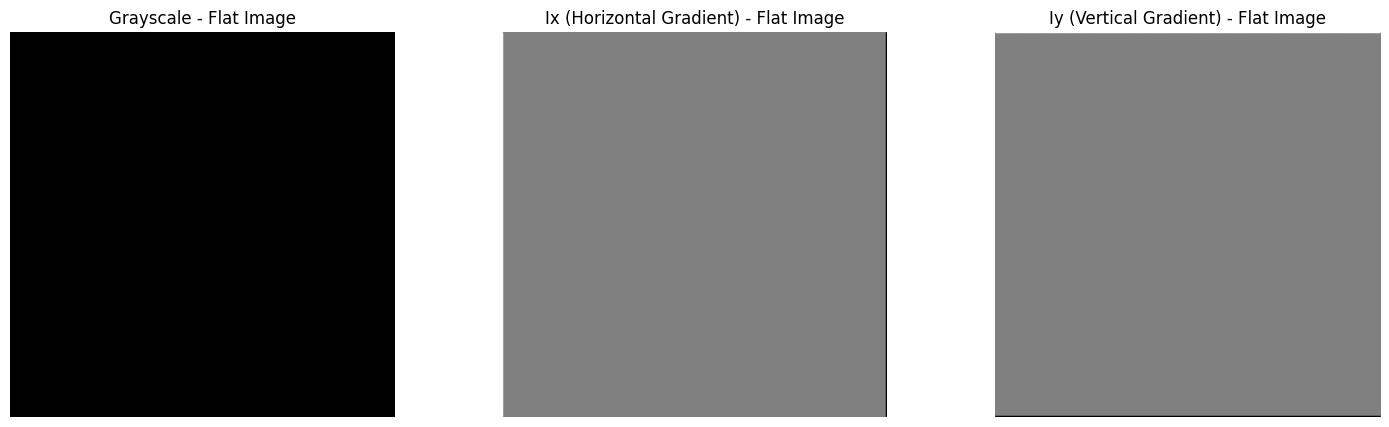

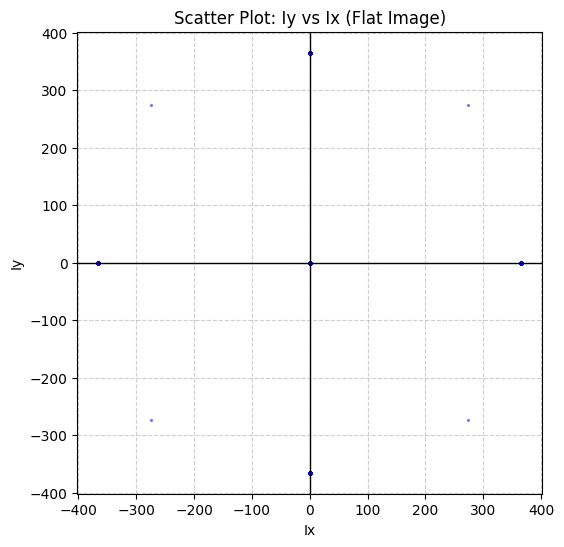


Processing EDGE image...
Applying threshold: Values with magnitude < 10 are set to 0.


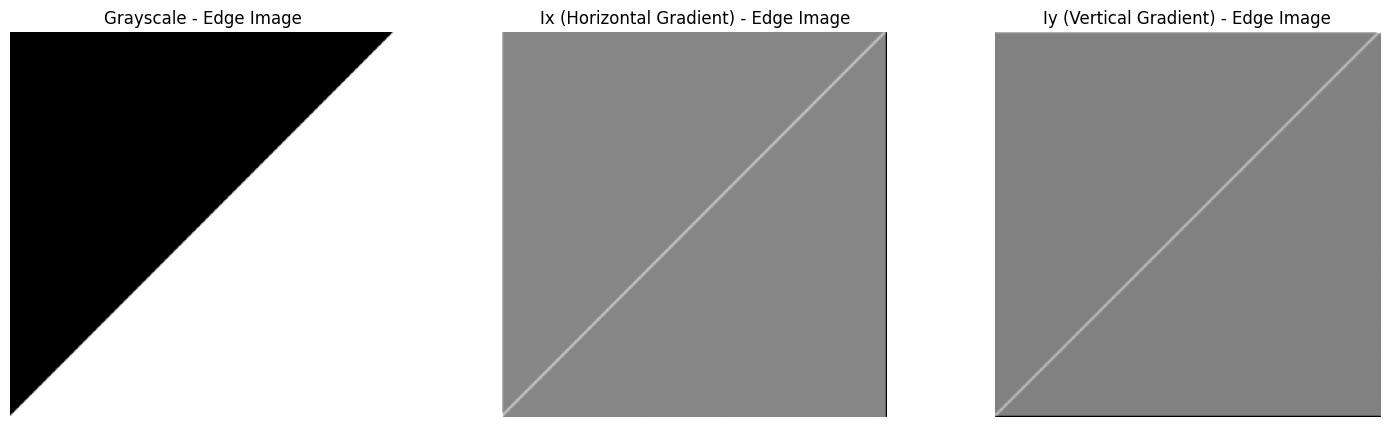

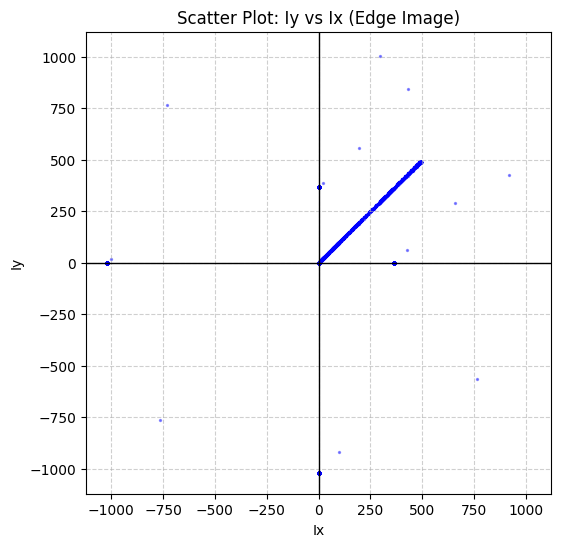


Processing CORNER image...
Applying threshold: Values with magnitude < 10 are set to 0.


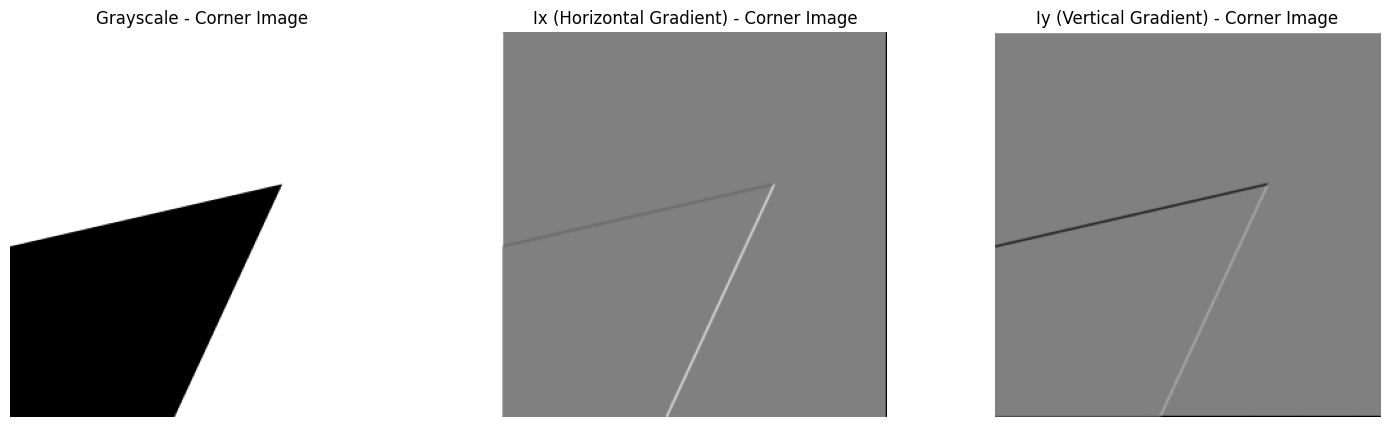

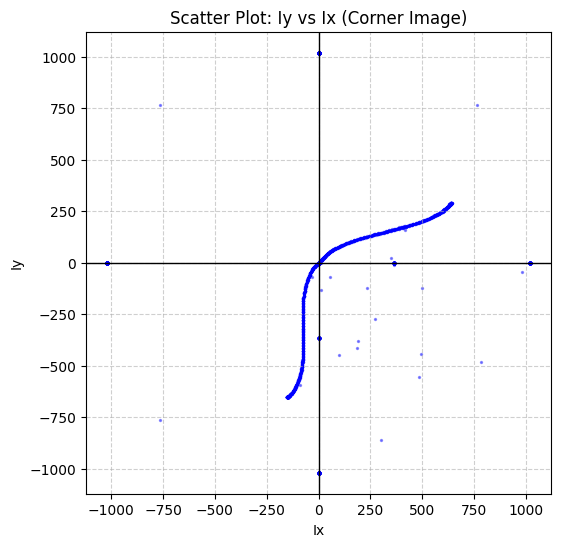

In [17]:
# --- Helper: Manual Convolution (Scratch Implementation) ---
def convolve_scratch(channel, kernel):
    i_h, i_w = channel.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2

    # Pad image to maintain size
    padded = np.pad(channel, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant')
    output = np.zeros_like(channel, dtype=np.float32)

    for y in range(i_h):
        for x in range(i_w):
            region = padded[y:y+k_h, x:x+k_w]
            output[y, x] = np.sum(region * kernel)
    return output

# --- Main Part A Function ---
def analyze_gradients(image, label="Image", threshold=None):
    """
    1. Converts image to grayscale.
    2. Computes Ix and Iy using Sobel kernels.
    3. Plots Grayscale, Ix, and Iy images.
    4. Plots Iy vs Ix Scatter Plot.
    5. Returns Ix, Iy for future questions.
    """
    # 1. Grayscale conversion (Hint requirement)
    if len(image.shape) == 3:
        # Standard luminance formula
        gray = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    else:
        gray = image

    # 2. Define Sobel Kernels (Gx and Gy)
    sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    # 3. Find Ix and Iy
    Ix = convolve_scratch(gray, sobel_x)
    Iy = convolve_scratch(channel=gray, kernel=sobel_y)

    # 4. Thresholding (If requested)
    # Mentioning clearly: If threshold is provided, we zero out small values to reduce noise.
    if threshold is not None:
        print(f"Applying threshold: Values with magnitude < {threshold} are set to 0.")
        mask = np.sqrt(Ix**2 + Iy**2) < threshold
        Ix[mask] = 0
        Iy[mask] = 0

    # 5. Plotting the Images
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    axes[0].imshow(gray, cmap='gray')
    axes[0].set_title(f"Grayscale - {label}")
    axes[0].axis('off')

    axes[1].imshow(Ix, cmap='gray')
    axes[1].set_title(f"Ix (Horizontal Gradient) - {label}")
    axes[1].axis('off')

    axes[2].imshow(Iy, cmap='gray')
    axes[2].set_title(f"Iy (Vertical Gradient) - {label}")
    axes[2].axis('off')
    plt.show()

    # 6. Scatter Plot (Iy vs Ix)
    plt.figure(figsize=(6, 6))
    plt.scatter(Ix.ravel(), Iy.ravel(), alpha=0.4, s=2, c='blue')
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.title(f"Scatter Plot: Iy vs Ix ({label})")
    plt.xlabel("Ix")
    plt.ylabel("Iy")
    plt.grid(True, linestyle='--', alpha=0.6)

    # Square the plot for better visualization of orientation
    limit = max(np.abs(plt.xlim()).max(), np.abs(plt.ylim()).max())
    plt.xlim(-limit, limit)
    plt.ylim(-limit, limit)
    plt.show()

    return Ix, Iy

# --- Execution ---
# Thresholding Mention: We use a small threshold of 10 to clear background noise.
threshold_val = 10

print("Processing FLAT image...")
Ix_flat, Iy_flat = analyze_gradients(flat, label="Flat Image", threshold=threshold_val)

print("\nProcessing EDGE image...")
Ix_edge, Iy_edge = analyze_gradients(edge, label="Edge Image", threshold=threshold_val)

print("\nProcessing CORNER image...")
Ix_corner, Iy_corner = analyze_gradients(corner, label="Corner Image", threshold=threshold_val)

### Part B - Ellipse Fitting and R Maps for Corner Detection

Now, use the above functions ( basically Ix and Iy ) and the formulas in the pre-session videos to find values of a,b and c ( the second moments ) and calculate the eigenvalues lambda1 and lambda2. Then use those to create an R map for the entire image. Display the R map. Do it for the 3 images of part A. So, you might want to create a function that takes the image, loops over the pixels with a window, fits the ellipse over the window, calculates the lambdas, and value of R, essentially finding R values for all the pixels and returning an R-map ( a 2d image with only one channel where the value of a pixel is the r-value of that pixel in the original grayscale image ). Now, display these R maps. Notice how the corners are clearly visible in white.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

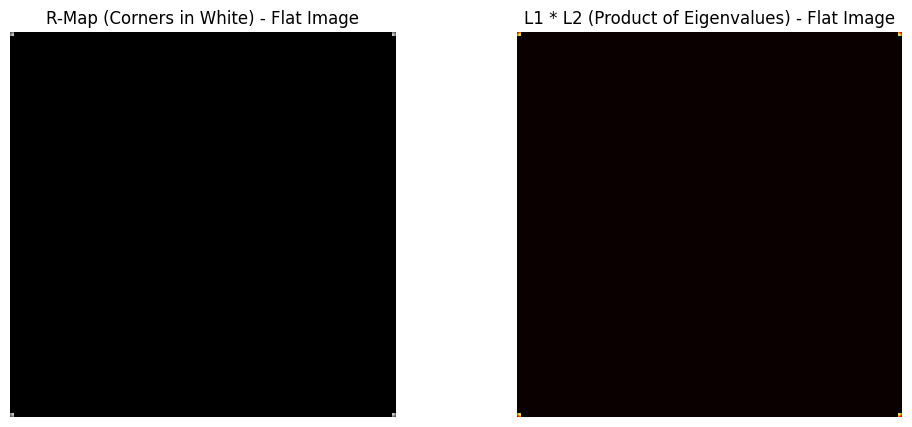

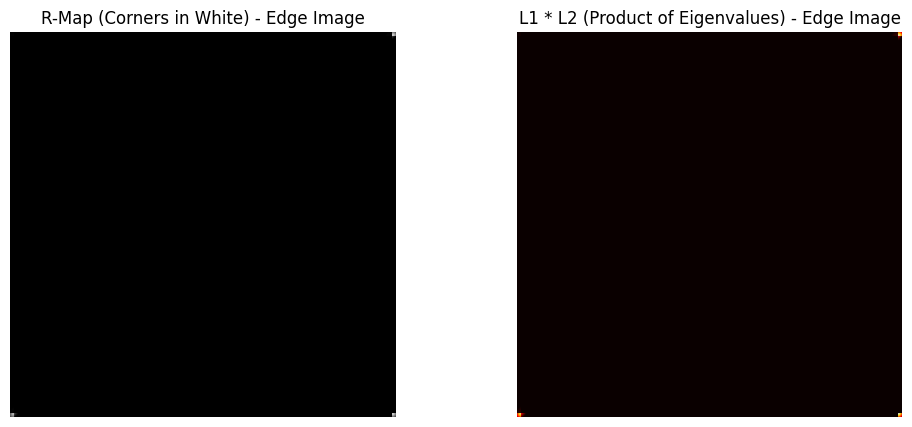

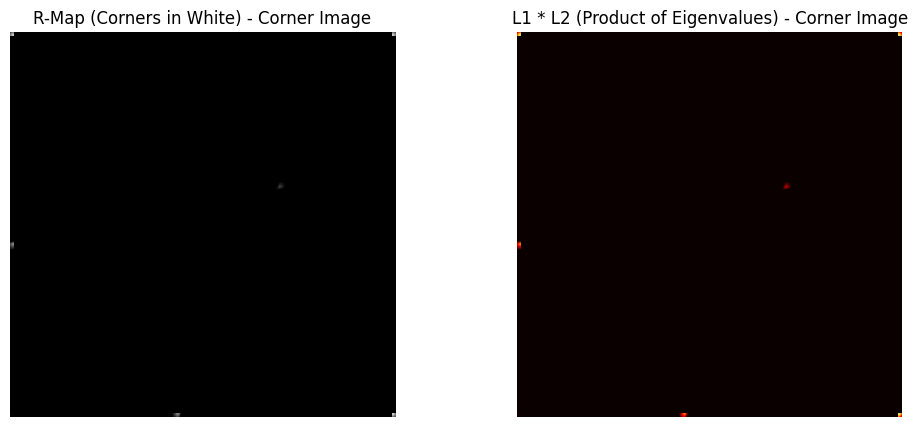

In [21]:
def generate_r_map(Ix, Iy, window_size=5, k=0.04):
    """
    Part B: Calculates eigenvalues and R-map using gradients from Part A.
    """
    # 1. Compute the components of the structure tensor
    Ixx = Ix**2
    Iyy = Iy**2
    Ixy = Ix * Iy

    # 2. Define a summation kernel (Box filter)
    # This represents the 'window' over which we fit the ellipse
    kernel = np.ones((window_size, window_size), dtype=np.float32)

    # Use your scratch convolution to sum the moments over the window
    a = convolve_scratch(Ixx, kernel)
    c = convolve_scratch(Iyy, kernel)
    b = convolve_scratch(Ixy, kernel)

    # 3. Calculate Eigenvalues (lambda 1 and lambda 2) for every pixel
    # Quadratic formula: det(M - lambda*I) = 0
    # lambda^2 - trace(M)*lambda + det(M) = 0

    trace = a + c
    determinant = (a * c) - (b**2)

    # Square root term for the quadratic formula
    # clip(0) ensures no negative values due to precision errors before sqrt
    sqrt_term = np.sqrt(np.clip(trace**2 - 4 * determinant, 0, None))

    l1 = (trace + sqrt_term) / 2
    l2 = (trace - sqrt_term) / 2

    # 4. Calculate R Map
    # R = det(M) - k * (trace(M))^2
    R = determinant - k * (trace**2)

    return l1, l2, R

def display_part_b(r_map, l1, l2, label):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Normalize R for visualization (Corners appear bright white)
    r_vis = np.clip(r_map, 0, None) # Only show positive R (corners)
    r_vis = (r_vis - r_vis.min()) / (r_vis.max() - r_vis.min() + 1e-6)

    axes[0].imshow(r_vis, cmap='gray')
    axes[0].set_title(f"R-Map (Corners in White) - {label}")
    axes[0].axis('off')

    # Optional: Visualization of lambda products to show intensity
    axes[1].imshow(l1 * l2, cmap='hot')
    axes[1].set_title(f"L1 * L2 (Product of Eigenvalues) - {label}")
    axes[1].axis('off')

    plt.show()

# --- Execution for your 3 images ---

# 1. Flat Image
l1_f, l2_f, R_flat = generate_r_map(Ix_flat, Iy_flat)
display_part_b(R_flat, l1_f, l2_f, "Flat Image")

# 2. Edge Image
l1_e, l2_e, R_edge = generate_r_map(Ix_edge, Iy_edge)
display_part_b(R_edge, l1_e, l2_e, "Edge Image")

# 3. Corner Image
l1_c, l2_c, R_corner = generate_r_map(Ix_corner, Iy_corner)
display_part_b(R_corner, l1_c, l2_c, "Corner Image")

### Part C - Hough Transforms

Again, import an image, create a function that takes the image, finds the canny edge map, then loops through it to find the equivalent line of each pixel, checks whether the slope and intercept are within acceptable limits of the accumulator size ( if not, discard ), does the voting procedure and creates the accumulator. Now, choose an accurate threshold for the accumulator to get the slope and intercept for a good number of lines in the image. One thing you can do is normalise the accumulator and use a 90 percent threshold ( just an example, im not telling if 90p is a good one or not ), then, mark the lines in the image using cv2 and display the final output. For the slope and intercept, choose the limit as per your image to get a good output. Please dont make it super large so it take hours to run and give the output.

Now, you can do the same but with rho theta method. Do this in a separate code cell from slope-intercept method and notice how fast this is

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

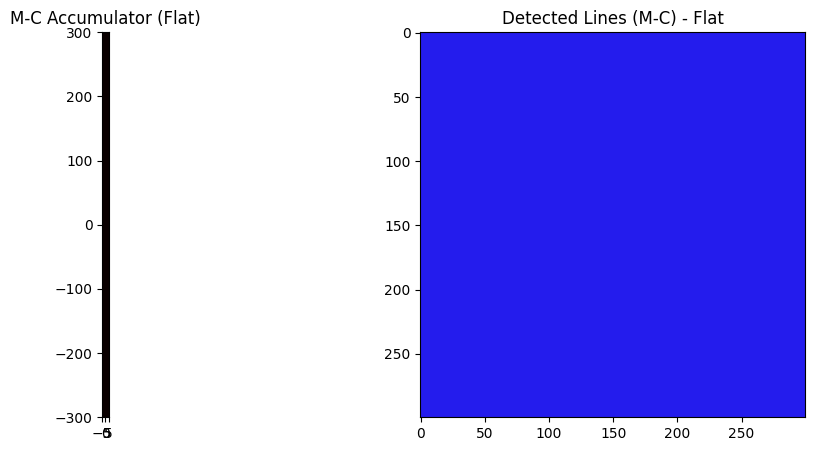

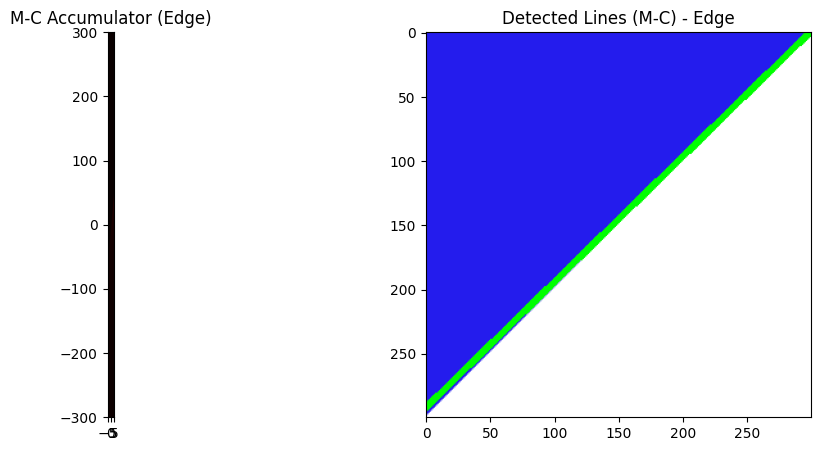

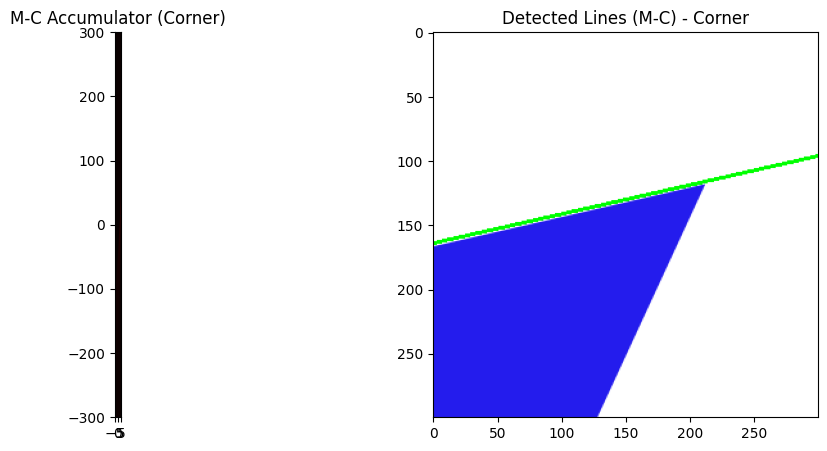

In [25]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def hough_slope_intercept_custom(img, label):
    # 1. Canny Edge Detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.uint8)
    edges = cv2.Canny(gray, 50, 150)

    # 2. Define Accumulator Space
    # We'll use a 200x200 grid for m and c
    res = 200
    m_min, m_max = -5, 5
    c_min, c_max = -img.shape[0], img.shape[0]

    m_axis = np.linspace(m_min, m_max, res)
    c_axis = np.linspace(c_min, c_max, res)
    accumulator = np.zeros((res, res))

    # 3. Voting Procedure
    y_idxs, x_idxs = np.nonzero(edges)
    for i in range(len(x_idxs)):
        x, y = x_idxs[i], y_idxs[i]
        for m_idx, m in enumerate(m_axis):
            # Calculate corresponding c: c = y - mx
            c = y - m * x
            if c_min <= c <= c_max:
                c_idx = int((c - c_min) / (c_max - c_min) * (res - 1))
                accumulator[m_idx, c_idx] += 1

    # 4. Thresholding (90% of max value)
    thresh = np.max(accumulator) * 0.90
    m_peaks, c_peaks = np.where(accumulator > thresh)

    # 5. Drawing Lines
    line_img = img.copy()
    for i in range(len(m_peaks)):
        m = m_axis[m_peaks[i]]
        c = c_axis[c_peaks[i]]
        # Define two points to draw the line
        x1, x2 = 0, img.shape[1]
        y1, y2 = int(m*x1 + c), int(m*x2 + c)
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return accumulator, line_img

# Process your 3 images
for img, name in [(flat, "Flat"), (edge, "Edge"), (corner, "Corner")]:
    acc, result = hough_slope_intercept_custom(img, name)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(acc, cmap='hot', extent=[-5, 5, -img.shape[0], img.shape[0]])
    axes[0].set_title(f"M-C Accumulator ({name})")
    axes[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f"Detected Lines (M-C) - {name}")
    plt.show()

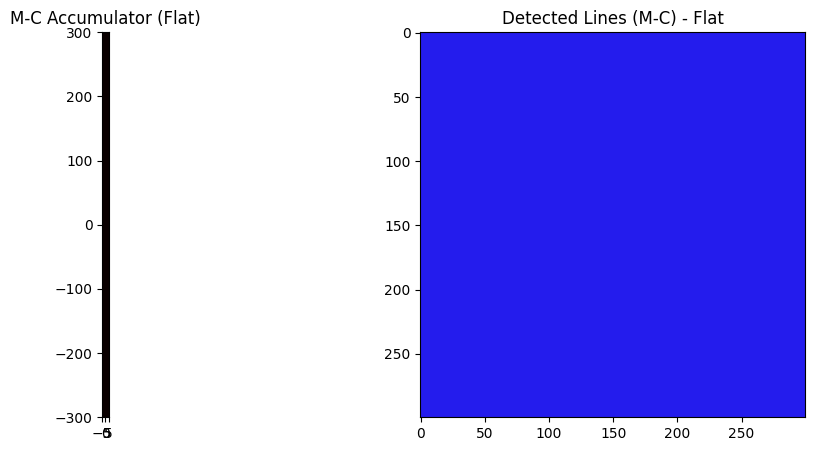

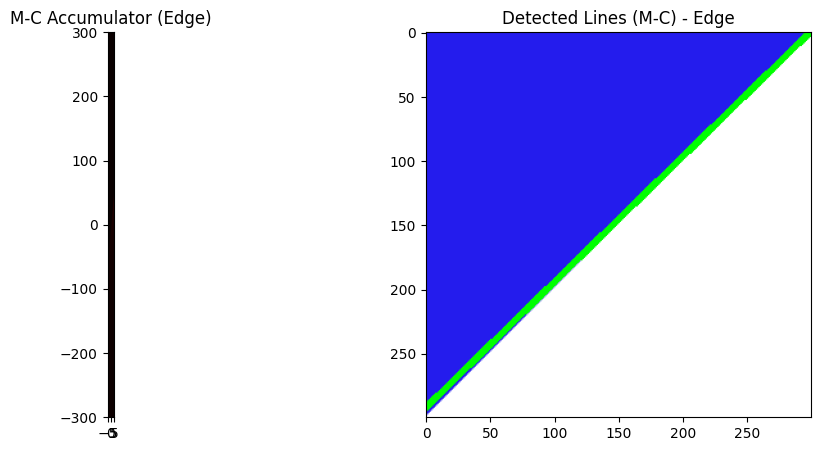

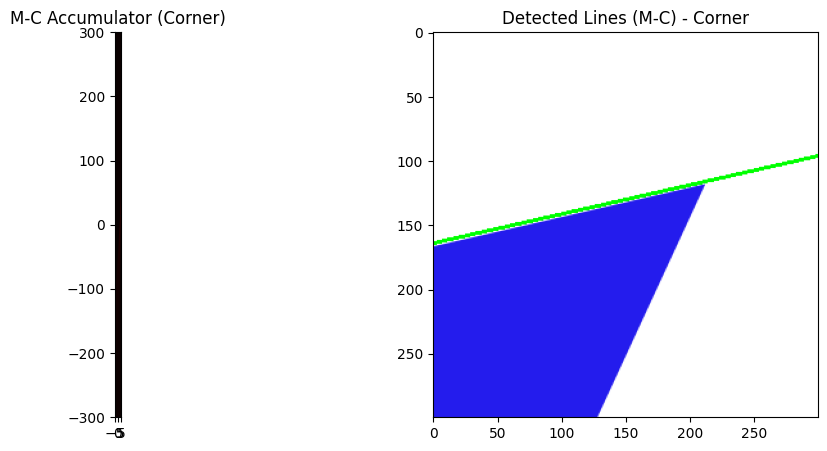

In [24]:

import cv2


def hough_slope_intercept_custom(img, label):
    # 1. Canny Edge Detection
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.uint8)
    edges = cv2.Canny(gray, 50, 150)

    # 2. Define Accumulator Space
    # We'll use a 200x200 grid for m and c
    res = 200
    m_min, m_max = -5, 5
    c_min, c_max = -img.shape[0], img.shape[0]

    m_axis = np.linspace(m_min, m_max, res)
    c_axis = np.linspace(c_min, c_max, res)
    accumulator = np.zeros((res, res))

    # 3. Voting Procedure
    y_idxs, x_idxs = np.nonzero(edges)
    for i in range(len(x_idxs)):
        x, y = x_idxs[i], y_idxs[i]
        for m_idx, m in enumerate(m_axis):
            # Calculate corresponding c: c = y - mx
            c = y - m * x
            if c_min <= c <= c_max:
                c_idx = int((c - c_min) / (c_max - c_min) * (res - 1))
                accumulator[m_idx, c_idx] += 1

    # 4. Thresholding (90% of max value)
    thresh = np.max(accumulator) * 0.90
    m_peaks, c_peaks = np.where(accumulator > thresh)

    # 5. Drawing Lines
    line_img = img.copy()
    for i in range(len(m_peaks)):
        m = m_axis[m_peaks[i]]
        c = c_axis[c_peaks[i]]
        # Define two points to draw the line
        x1, x2 = 0, img.shape[1]
        y1, y2 = int(m*x1 + c), int(m*x2 + c)
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return accumulator, line_img

# Process your 3 images
for img, name in [(flat, "Flat"), (edge, "Edge"), (corner, "Corner")]:
    acc, result = hough_slope_intercept_custom(img, name)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].imshow(acc, cmap='hot', extent=[-5, 5, -img.shape[0], img.shape[0]])
    axes[0].set_title(f"M-C Accumulator ({name})")
    axes[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[1].set_title(f"Detected Lines (M-C) - {name}")
    plt.show()

### Bonus - Part D

Here, what you have to do is something like :    
1. Create a python function that will take the first image and a set of coordinates ( x1,y1 ) - top left and ( x2,y2 ) - bottom right to form a box around the white ball. Now, find gradients, select the biggest completed gradient ( maximum area contour ) and then create an RGBA ( 4 channel ) stencil.

2. Now, create another function that takes this stencil and second image and a coordinate ( x3,y3 ). Now, treat ( x3,y3 ) as center point and overlap the RGBA stencil with second image. Keep x3 y3 such that it is towards the right to make it look like that white ball is on the green pool image.


Again, I do not expect you guys to get a really good result. Try your best though.

array([[[ 91,  71,  46],
        [ 91,  71,  46],
        [ 92,  72,  47],
        ...,
        [ 87,  71,  58],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       [[ 90,  70,  47],
        [ 90,  70,  47],
        [ 90,  70,  47],
        ...,
        [ 86,  70,  57],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       [[ 87,  66,  45],
        [ 87,  66,  45],
        [ 87,  66,  45],
        ...,
        [ 86,  70,  57],
        [ 86,  70,  55],
        [ 86,  70,  55]],

       ...,

       [[  8,  83, 215],
        [  8,  83, 215],
        [  8,  83, 215],
        ...,
        [  7,  72, 198],
        [  6,  71, 197],
        [  6,  71, 197]],

       [[  8,  83, 215],
        [  8,  83, 215],
        [  8,  83, 215],
        ...,
        [  7,  72, 198],
        [  6,  71, 197],
        [  6,  71, 197]],

       [[  7,  84, 215],
        [  7,  84, 215],
        [  7,  84, 215],
        ...,
        [  7,  70, 198],
        [  7,  70, 198],
        [  7,  70, 198]]], dtype=uint8)
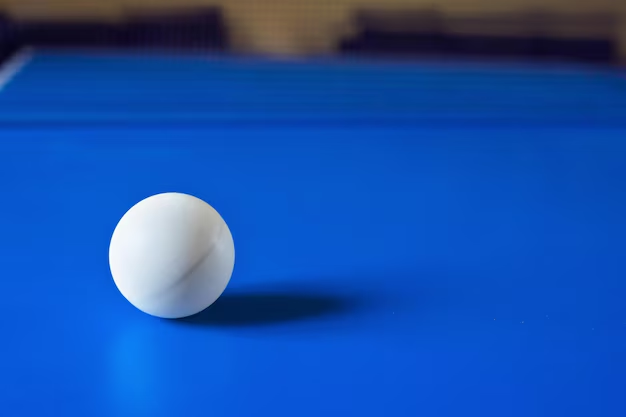

In [ ]:
ball

array([[[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       [[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       [[ 61, 166,  99],
        [ 60, 165,  98],
        [ 60, 165,  98],
        ...,
        [  6,  28,  16],
        [  6,  28,  16],
        [  6,  28,  16]],

       ...,

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]],

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]],

       [[ 65, 146,  79],
        [ 65, 146,  79],
        [ 65, 146,  80],
        ...,
        [ 35, 123,  62],
        [ 35, 123,  62],
        [ 35, 123,  62]]], dtype=uint8)
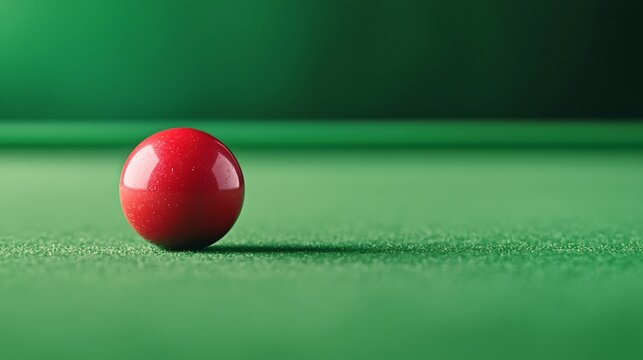

In [ ]:
ball2

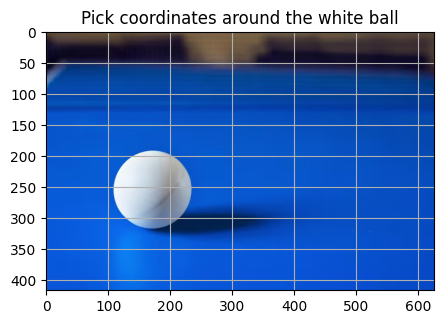

In [ ]:
plt.figure(figsize=(5,5))
plt.imshow(ball)
plt.axis("on")
plt.grid(True)
plt.title("Pick coordinates around the white ball")
plt.show()
